In [11]:
pip install deep-pipe

     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 1.7 MB 46.5 MB/s 
     |████████████████████████████████| 180 kB 64.2 MB/s 
     |████████████████████████████████| 97 kB 4.9 MB/s 
     |████████████████████████████████| 140 kB 48.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for deep-pipe: filename=deep_pipe-0.1.1-py3-none-any.whl size=102401 sha256=eb0550951ac799e99ac2b921bd4c6387a7ea684d42baf9a4e6417c52dba9b541
  Stored in directory: /root/.cache/pip/wheels/e9/d1/b3/9e1a4c95d9c2e162c4954c9088026ef3c0e0d539164e124f58
  Created wheel for pdp: filename=pdp-0.3.0-py3-none-any.whl size=6618 sha256=3597094b05e82aef28015c12814c88b2ea514390dc649affdbe99ccd6d611e67
  Stored in directory: /root/.cache/pip/wheels/86/3f/21/790268989f0e594527d3b781d80e150499eb918f8c88c1509a
  Created wheel for lazycon: filename=lazycon-0.3.1-py3-none-any.whl size=18969 sha256=5

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset
from dpipe.layers.resblock import ResBlock2d
from dpipe.layers.conv import PreActivation2d
import copy
import matplotlib.pyplot as plt
from statistics import mean
torch.autograd.set_detect_anomaly(True)
import random
from torchvision import transforms
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
from pathlib import Path
import string
from sklearn.preprocessing import MinMaxScaler
import torch
import nibabel as nib
from torch.utils.data import Dataset
from torch.utils.data import random_split
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

from google.colab import drive
drive.mount('/content/gdrive') #, force_remount = True

cpu
Mounted at /content/gdrive


# Prepare Data

In [ ]:
# def make_scan_list(domain, scan_type, path):
#   scans = []
#   for filename in os.listdir(path):
#     if (domain in filename) and (filename.split('_')[2] == scan_type):
#       scans.append(filename)

#   return scans

# ################################################################################

# def make_scan_slice_list( scan_base_path, scan_list, domain_label):

#   scan_slice_id_list = []
  
#   for scan in scan_list:

#     scan_nii = nib.load(os.path.join( scan_base_path , scan))
#     scan_tensor = torch.from_numpy(np.asarray(scan_nii.dataobj))

#     total_slices = scan_tensor.shape[0]

#     for i in range(total_slices):
#             scan_slice_id = scan + "," + str(i) + "," + domain_label
#             scan_slice_id_list.append(scan_slice_id)

#   return scan_slice_id_list

# ################################################################################

# def make_text_file(scan_list, file_path, file_name):
#   with open(os.path.join("data", file_path, file_name), "w") as text_file:
#         for file in scan_list:
#             text_file.write(file)
#             text_file.write("\n")


# ################################################################################

# def train_val_test_split(source_domain, target_domain, source_label, target_label, scan_type, path):

#   file_path = path+'Original/'

#   source_scans = make_scan_list(source_domain, scan_type, file_path)
#   target_scans = make_scan_list(target_domain, scan_type, file_path)

#   random.shuffle(source_scans)
#   random.shuffle(target_scans)

#   # TRAIN
#   src_train_idx = int(len(source_scans) * 0.7)
#   trg_train_idx = int(len(target_scans) * 0.7)
  
#   src_train_scans = source_scans[:src_train_idx ]
#   trg_train_scans = target_scans[:trg_train_idx]

#   # VAL
#   src_val_idx = int(len(source_scans) * 0.9)  
#   trg_val_idx = int(len(target_scans) * 0.9)
  
#   src_val_scans = source_scans[src_train_idx:src_val_idx]
#   trg_val_scans = target_scans[trg_train_idx:trg_val_idx]
  
#   # TEST
#   src_test_scans = source_scans[src_val_idx:]
#   trg_test_scans = target_scans[trg_val_idx:]
  
#   print("Src Lengths:", len(src_train_scans), len(src_val_scans), len(src_test_scans))
#   print("Trg Lengths:", len(trg_train_scans), len(trg_val_scans), len(trg_test_scans))

#   # Convert to list of indices
#   src_train_scans_slice_list = make_scan_slice_list( file_path, src_train_scans, source_label)
#   trg_train_scans_slice_list = make_scan_slice_list( file_path, trg_train_scans, target_label)

#   src_val_scans_slice_list = make_scan_slice_list( file_path, src_val_scans, source_label)
#   trg_val_scans_slice_list = make_scan_slice_list( file_path, trg_val_scans, target_label)

#   src_test_scans_slice_list = make_scan_slice_list( file_path, src_test_scans, source_label)
#   trg_test_scans_slice_list = make_scan_slice_list( file_path, trg_test_scans, target_label)
  
  
#   print("Src Lengths:", len(src_train_scans_slice_list), len(src_val_scans_slice_list), len(src_test_scans_slice_list) )
#   print("Trg Lengths:", len(trg_train_scans_slice_list), len(trg_val_scans_slice_list), len(trg_test_scans_slice_list) )

  
#   #Merge train scans list
#   train_scans_slice_list = src_train_scans_slice_list + trg_train_scans_slice_list
#   random.shuffle(train_scans_slice_list)
#   print("Train length", len(train_scans_slice_list))
#   make_text_file(train_scans_slice_list, path, source_domain+target_domain+scan_type+'_train.txt')

#   ######
  
#   make_text_file(src_val_scans_slice_list, path, source_domain+scan_type+'_val.txt')
#   make_text_file(src_test_scans_slice_list,path, source_domain+scan_type+'_test.txt')

#   make_text_file(trg_val_scans_slice_list, path, target_domain+scan_type+'_val.txt')
#   make_text_file(trg_test_scans_slice_list, path, target_domain+scan_type+'_test.txt')

In [ ]:
# train_val_test_split(source_domain = 'ge',target_domain ='philips',source_label = '1',target_label='0', scan_type='3', path='/content/gdrive/MyDrive/VMIA_Lab_Data/data/')

# Dataloader (Text file based)

In [ ]:
# def get_transform(pad_size):
#     pad = transforms.Pad(pad_size, fill=0, padding_mode="constant")  
#     return transforms.Compose([pad])

# def read_nib(nib_path, nib_name, slice_id, max_pad):
  
#     nii = nib.load(os.path.join(nib_path, nib_name))
#     tensor = torch.from_numpy(np.asarray(nii.dataobj))
#     normalized_tensor = tensor/tensor.max()

#     scan_size = normalized_tensor.shape[-1]
#     transform = get_transform(int((max_pad - scan_size) / 2))
#     scan_slice = transform(normalized_tensor[slice_id])

#     return scan_slice

In [ ]:
# import time
# class ScanTrain(Dataset):
#     def __init__(self, mode, src_domain, trg_domain, scan_type, path):

#         self.mode = mode
#         self.scan_path = path + 'Original/'
#         self.mask_path = path + 'Silver-standard/'
        
#         self.src_domain = src_domain
#         self.trg_domain = trg_domain

#         self.scan_type = scan_type        
#         self.max_pad = 288

#         with open(path + self.src_domain + self.trg_domain + self.scan_type+"_"+self.mode+".txt", "r") as f:
#           self.scan_slice_list = f.read().split("\n")[:-1]
  
#     def __len__(self):
#         return len(self.scan_slice_list)

#     def __getitem__(self, idx):

#         # start = time.time()
        
#         scan_slice = self.scan_slice_list[idx]

#         scan_name = scan_slice.split(",")[0]
#         mask_name = scan_name.split(".nii")[0] + "_ss.nii.gz"
#         slice_id = int(scan_slice.split(",")[1])
#         label = int(scan_slice.split(",")[2])

#         scan = read_nib(self.scan_path, scan_name, slice_id, self.max_pad)
#         mask = read_nib(self.mask_path, mask_name, slice_id, self.max_pad)

#         # end = time.time()
#         # print ("Time elapsed:", end - start)
        
#         return scan, mask, label

In [ ]:
# class ScanVal(Dataset):
#     def __init__(self, mode, domain, scan_type, path):

#         self.mode = mode
#         self.scan_path = path + 'Original/'
#         self.mask_path = path + 'Silver-standard/'
        
#         self.domain = domain
#         self.scan_type = scan_type        
#         self.max_pad = 288

#         with open(path + self.domain + self.scan_type+"_"+self.mode+".txt", "r") as f:
#           self.scan_slice_list = f.read().split("\n")[:-1]
  
#     def __len__(self):
#         return len(self.scan_slice_list)

#     def __getitem__(self, idx):

#         scan_slice = self.scan_slice_list[idx]

#         scan_name = scan_slice.split(",")[0]
#         mask_name = scan_name.split(".nii")[0] + "_ss.nii.gz"
#         slice_id = int(scan_slice.split(",")[1])
#         label = int(scan_slice.split(",")[2])

#         scan = read_nib(self.scan_path, scan_name, slice_id)
#         mask = read_nib(self.mask_path, mask_name, slice_id)

#         scan_size = scan.shape[-1]
#         transform = get_transform(int((self.max_pad - scan_size) / 2))
#         scan = transform(scan)
#         mask = transform(mask)
        
#         return scan, mask, label

In [ ]:
# batch_size = 16

# train_data = ScanTrain( mode= 'train', src_domain ='ge', trg_domain='philips', scan_type='3', path='/content/gdrive/MyDrive/VMIA_Lab_Data/data/')
# print(len(train_data))  
# train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True ,num_workers = 2)


15864


In [ ]:

# ###########

# ge_val_data = ScanVal( mode= 'val', domain ='ge', scan_type='3', path='/content/gdrive/MyDrive/VMIA_Lab_Data/data/')
# print(len(ge_val_data))  
# ge_val_loader = torch.utils.data.DataLoader(dataset = ge_val_data, batch_size = batch_size, shuffle = False ,num_workers = 0)

# ##########

# ge_test_data = ScanVal( mode= 'test', domain ='ge', scan_type='3', path='/content/gdrive/MyDrive/VMIA_Lab_Data/data/')
# print(len(ge_test_data))  
# ge_test_loader = torch.utils.data.DataLoader(dataset = ge_test_data, batch_size = batch_size, shuffle = False,num_workers = 0)

# ###########

# philips_val_data = ScanVal( mode= 'val', domain ='philips', scan_type='3', path='/content/gdrive/MyDrive/VMIA_Lab_Data/data/')
# print(len(philips_val_data))  
# philips_val_loader = torch.utils.data.DataLoader(dataset = philips_val_data, batch_size = batch_size, shuffle = False ,num_workers = 0)

# ###########

# philips_test_data = ScanVal( mode= 'test', domain ='philips', scan_type='3', path='/content/gdrive/MyDrive/VMIA_Lab_Data/data/')
# print(len(philips_test_data))  
# philips_test_loader = torch.utils.data.DataLoader(dataset = philips_test_data, batch_size = batch_size, shuffle = False ,num_workers = 0)


# Dataloader (Pre-processed)

In [4]:
import time
class Disc_Train_PreprocessedData(Dataset):
  def __init__(self, mode = 'train'): 
    self.images = torch.from_numpy(np.concatenate(
                    [np.load('/content/gdrive/MyDrive/GE/ge3_'+ mode + '_original_images.npy'),
                    np.load('/content/gdrive/MyDrive/Philips/philips3_'+ mode + '_original_images.npy')],
                    axis = 0)).float()

    self.labels = torch.cat([ torch.ones(8280), torch.zeros(7560) ])

    print(self.images.shape)
    print(self.labels.shape)

    indexes = list(range(len(self.images)))
    random.shuffle(indexes)
    self.images = self.images[indexes,:,:]
    self.labels = self.labels[indexes]
    
  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):

    original_batch = self.images[idx]
    labels = self.labels[idx]

    return original_batch, labels 


In [5]:
class Disc_Val_PreprocessedData(Dataset):
  def __init__(self, mode = 'val', domain = 'ge'): 
    
    if domain == 'ge':
      path = '/content/gdrive/MyDrive/GE/'

    elif domain == 'philips':
      path = '/content/gdrive/MyDrive/Philips/'

    self.images = torch.from_numpy(np.load(path + domain + '3_' + mode + '_original_images.npy')).float()
    
    if domain == 'ge':
      self.labels = torch.ones(len(self.images))
    elif domain == 'philips':
      self.labels = torch.zeros(len(self.images))
    
  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):

    original_batch = self.images[idx]
    labels = self.labels[idx]
    
    return original_batch, labels 


In [6]:
batch_size = 16

train_data = Disc_Train_PreprocessedData(mode ='train' )
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True ,num_workers = 0)

print(len(train_data))
print(train_data.images.shape)
print(train_data.labels.shape)

###################################

torch.Size([15840, 288, 288])
torch.Size([15840])
15840
torch.Size([15840, 288, 288])
torch.Size([15840])


In [7]:
batch_size = 16

src_val_data = Disc_Val_PreprocessedData(mode ='val', domain = 'ge' )
src_val_loader = torch.utils.data.DataLoader(dataset = src_val_data, batch_size = batch_size, shuffle = False,num_workers = 0)

trg_val_data = Disc_Val_PreprocessedData(mode ='val', domain = 'philips' )
trg_val_loader = torch.utils.data.DataLoader(dataset = trg_val_data, batch_size = batch_size, shuffle = False,num_workers = 0)

print(len(src_val_data), len(trg_val_data))
print(src_val_data.images.shape, trg_val_data.images.shape)
print(src_val_data.labels.shape, trg_val_data.labels.shape)

2152 1980
torch.Size([2152, 288, 288]) torch.Size([1980, 288, 288])
torch.Size([2152]) torch.Size([1980])


# MODEL

## Unet

In [27]:
class UNet2D(nn.Module):
    def __init__(self, n_chans_in, n_chans_out, kernel_size=3, padding=1, pooling_size=2, n_filters_init=8,
                 dropout=False, p=0.1):
        super().__init__()
        self.kernel_size = kernel_size
        self.padding = padding
        self.pooling_size = pooling_size
        n = n_filters_init
        if dropout:
            dropout_layer = nn.Dropout(p)
        else:
            dropout_layer = nn.Identity()

        self.init_path = nn.Sequential(
            nn.Conv2d(n_chans_in, n, self.kernel_size, padding=self.padding, bias=False),
            nn.ReLU(),
            ResBlock2d(n, n, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n, n, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n, n, kernel_size=self.kernel_size, padding=self.padding)
        )
        self.shortcut0 = nn.Conv2d(n, n, 1)

        self.down1 = nn.Sequential(
            nn.BatchNorm2d(n),
            nn.Conv2d(n, n * 2, kernel_size=pooling_size, stride=pooling_size, bias=False),
            nn.ReLU(),
            dropout_layer,
            ResBlock2d(n * 2, n * 2, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 2, n * 2, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 2, n * 2, kernel_size=self.kernel_size, padding=self.padding)
        )
        self.shortcut1 = nn.Conv2d(n * 2, n * 2, 1)

        self.down2 = nn.Sequential(
            nn.BatchNorm2d(n * 2),
            nn.Conv2d(n * 2, n * 4, kernel_size=pooling_size, stride=pooling_size, bias=False),
            nn.ReLU(),
            dropout_layer,
            ResBlock2d(n * 4, n * 4, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 4, n * 4, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 4, n * 4, kernel_size=self.kernel_size, padding=self.padding)
        )
        self.shortcut2 = nn.Conv2d(n * 4, n * 4, 1)

        self.down3 = nn.Sequential(
            nn.BatchNorm2d(n * 4),
            nn.Conv2d(n * 4, n * 8, kernel_size=pooling_size, stride=pooling_size, bias=False),
            nn.ReLU(),
            dropout_layer,
            ResBlock2d(n * 8, n * 8, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 8, n * 8, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 8, n * 8, kernel_size=self.kernel_size, padding=self.padding),
            dropout_layer
        )

        self.up3 = nn.Sequential(
            ResBlock2d(n * 8, n * 8, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 8, n * 8, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 8, n * 8, kernel_size=self.kernel_size, padding=self.padding),
            nn.BatchNorm2d(n * 8),
            nn.ConvTranspose2d(n * 8, n * 4, kernel_size=self.pooling_size, stride=self.pooling_size, bias=False),
            nn.ReLU(),
            dropout_layer
        )

        self.up2 = nn.Sequential(
            ResBlock2d(n * 4, n * 4, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 4, n * 4, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 4, n * 4, kernel_size=self.kernel_size, padding=self.padding),
            nn.BatchNorm2d(n * 4),
            nn.ConvTranspose2d(n * 4, n * 2, kernel_size=self.pooling_size, stride=self.pooling_size, bias=False),
            nn.ReLU(),
            dropout_layer
        )

        self.up1 = nn.Sequential(
            ResBlock2d(n * 2, n * 2, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 2, n * 2, kernel_size=self.kernel_size, padding=self.padding),
            ResBlock2d(n * 2, n * 2, kernel_size=self.kernel_size, padding=self.padding),
            nn.BatchNorm2d(n * 2),
            nn.ConvTranspose2d(n * 2, n, kernel_size=self.pooling_size, stride=self.pooling_size, bias=False),
            nn.ReLU(),
            dropout_layer
        )

        self.out_path = nn.Sequential(
            ResBlock2d(n, n, kernel_size=1),
            PreActivation2d(n, n_chans_out, kernel_size=1),
            nn.BatchNorm2d(n_chans_out)
        )

    def forward(self, x):
        x0 = self.init_path(x)
        x1 = self.down1(x0)
        x2 = self.down2(x1)
        x3 = self.down3(x2)

        x2_up = self.up3(x3)
        x1_up = self.up2(x2_up + self.shortcut2(x2))
        x0_up = self.up1(x1_up + self.shortcut1(x1))
        x_out = self.out_path(x0_up + self.shortcut0(x0))

        return F.sigmoid(x_out), x3

## Disc_Feature

In [12]:
class Disc_Feature(nn.Module):
    def __init__(self, kernel_size=3, n_filters_init=8):
        super(Disc_Feature, self).__init__()
        n = n_filters_init

        self.conv = nn.Sequential(
            nn.Conv2d(n * 8, n * 16, stride=2, kernel_size=3),
            nn.BatchNorm2d(n*16),
            nn.ReLU(),
            nn.Conv2d(n * 16, n * 32, stride=2, kernel_size=3),
            nn.BatchNorm2d(n*32),
            nn.ReLU(),
            nn.Conv2d(n * 32, n * 64, stride=2, kernel_size=3),
            nn.BatchNorm2d(n*64),
            nn.ReLU(),
            nn.Dropout(0.25)
        )

        self.flat_map_dim = self.dummy_forward()
        
        self.fc = nn.Sequential(
        nn.Linear(self.flat_map_dim, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, 1)
        )

        self.sigmoid = nn.Sigmoid()

    def dummy_forward(self):
        dummy_x = torch.rand(1, 64, 36, 36)
        feature_map= self.conv(dummy_x)
        flat_map_dim = feature_map.view(1, -1).shape[-1]
        return flat_map_dim

    def forward(self, x):

        feature_map = self.conv(x)

        print(feature_map.shape)

        batch_size = feature_map.shape[0]

        out = self.fc(feature_map.view(batch_size,-1))

        return self.sigmoid(out)

x = torch.rand(8, 64, 36, 36)
model = Disc_Feature()
print(model(x))
print(model(x).shape)

torch.Size([8, 512, 3, 3])
tensor([[0.6540],
        [0.3351],
        [0.7111],
        [0.6103],
        [0.2433],
        [0.6682],
        [0.6811],
        [0.5318]], grad_fn=<SigmoidBackward0>)
torch.Size([8, 512, 3, 3])
torch.Size([8, 1])


## Disc_Ent

In [26]:
class Disc_Entropy(nn.Module):
  def __init__(self, kernel_size = 3, n_filters_init = 1):
    super(Disc_Entropy, self).__init__()
    n = n_filters_init

    self.conv = nn.Sequential(
        nn.Conv2d( 1 , 32, stride=2, kernel_size=3),
        #nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d( 32, 64 , stride=2, kernel_size=3),
        #nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d( 64, 128, stride=2, kernel_size=3),
        #nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(128, 256, stride=2, kernel_size=3),
        #nn.BatchNorm2d( 256),
        nn.ReLU(),
        nn.Conv2d(256, 512, stride=2, kernel_size=3),
        #nn.BatchNorm2d( 512),
        nn.ReLU(),
        #nn.Dropout(0.25)
    )

    self.flat_map_dim = 512*8*8 

    self.fc = nn.Sequential(
        nn.Linear(self.flat_map_dim, 512),
        #nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 64),
        #nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64, 1)
        #nn.Dropout(0.5),    
    )

    self.sigmoid = nn.Sigmoid()
   

  def forward(self, x):

    x1 = self.conv(x) # (B, 512, 8, 8)

    batch_size = x1.shape[0]
    
    x2 = self.fc( x1.view(batch_size,-1) )
  
    return self.sigmoid(x2)

x = torch.rand(8, 1, 288, 288)
model = Disc_Entropy()
print(model(x))
print(model(x).shape)

tensor([[0.5229],
        [0.5228],
        [0.5228],
        [0.5227],
        [0.5229],
        [0.5227],
        [0.5228],
        [0.5228]], grad_fn=<SigmoidBackward0>)
torch.Size([8, 1])


# Pre-train disc feature

In [27]:

#seg_model = UNet2D(1,1).to(device)
seg_model = torch.load('/content/gdrive/MyDrive/VMIA_Lab_Data/GE3/ge3_updateddata_train70_25epochs_combinedloss.pkl',map_location=device)
disc_model = Disc_Feature().to(device)

disc_opt = torch.optim.Adam( disc_model.parameters(), lr = 0.0001 )
loss = torch.nn.BCELoss()


train_stats = {'loss':[],'acc':[]}
src_val_stats = {'loss':[], 'acc':[]}
trg_val_stats = {'loss':[], 'acc':[]}


In [ ]:
def test_feature_disc(seg_model, disc_model, test_loader, device):
  seg_model.eval()
  disc_model.eval()

  test_loss = []
  correct = 0 
  total = 0

  loss = torch.nn.BCELoss()

  for batch_idx, data in enumerate(test_loader):

      original = torch.unsqueeze(data[0], axis = 1).float().to(device)
      label = data[1].float().to(device)

      seg_out, x3 = seg_model(original)
      disc_out = disc_model(x3.detach().to(device)).squeeze()

      disc_loss = loss(disc_out, label)

      if batch_idx % 10 == 0:
        print("TEST",n,":", batch_idx,"/",len(val_loader), ": BCE loss:", disc_loss.item())

      # APPEND STATS
      test_loss.append(disc_loss.item())
      disc_preds = torch.where(disc_out > 0.5, 1, 0)   
 
      correct += (label == disc_preds).sum()
      total += len(label)

  print("TEST Epoch acc", (correct/total).item())
  
  return test_loss, (correct/total).item()

In [ ]:
def val_feature_disc(curr_epoch, seg_model, disc_model, val_loader, device):
  seg_model.eval()
  disc_model.eval()

  val_loss = []
  correct = 0 
  total = 0

  loss = torch.nn.BCELoss()

  for batch_idx, data in enumerate(val_loader):

      original = torch.unsqueeze(data[0], axis = 1).float().to(device)
      label = data[1].float().to(device)

      seg_out, x3 = seg_model(original)
      disc_out = disc_model(x3.detach().to(device)).squeeze()

      disc_loss = loss(disc_out, label)

      if batch_idx % 10 == 0:
        print("VAL",n,":", batch_idx,"/",len(val_loader), ": BCE loss:", disc_loss.item())

      # APPEND STATS
      val_loss.append(disc_loss.item())
      disc_preds = torch.where(disc_out > 0.5, 1, 0)   
 
      correct += (label == disc_preds).sum()
      total += len(label)

  print("VAL Epoch acc", (correct/total).item())
  
  return val_loss, (correct/total).item()

In [ ]:
n_epochs = 5

for n in range(n_epochs):

  print("EPOCH: ",n)
  
  disc_model.train()

  train_loss = []
  
  correct = 0 
  total = 0

  for batch_idx, data in enumerate(train_loader):

      disc_opt.zero_grad()

      original = torch.unsqueeze(data[0].float(), axis = 1).to(device)
      label = data[1].float().to(device)

      seg_out, x3 = seg_model(original)
      disc_out = disc_model(x3.detach().to(device)).squeeze()

      disc_loss = loss(disc_out, label)

      disc_loss.backward()
      disc_opt.step()

      if batch_idx % 10 == 0:
        print(n,":", batch_idx,"/",len(train_loader), ": BCE loss:", disc_loss.item())


      # APPEND STATS
      train_loss.append(disc_loss.item())
      disc_preds = torch.where(disc_out > 0.5, 1, 0)   
 
      correct += (label == disc_preds).sum()
      total += len(label)
      acc = (correct/total).item()
      
      
  print("Traing Epoch acc",acc )

  train_stats['loss'].append(train_loss)
  train_stats['acc'].append(acc)

  # VALIDATE AT THE END OF EPOCH
  print()
  print("SRC VALIDATION: ")
  src_val_loss, src_val_acc = val_feature_disc(n, seg_model, disc_model, src_val_loader, device)
  src_val_stats['loss'].append(src_val_loss)
  src_val_stats['acc'].append(src_val_acc)

  print()
  print("TRG VALIDATION")
  trg_val_loss, trg_val_acc = val_feature_disc(n, seg_model, disc_model, trg_val_loader, device)
  trg_val_stats['loss'].append(trg_val_loss)
  trg_val_stats['acc'].append(trg_val_acc)


EPOCH:  0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 : 0 / 990 : BCE loss: 0.7253177762031555
0 : 10 / 990 : BCE loss: 0.5770191550254822
0 : 20 / 990 : BCE loss: 0.3008245825767517
0 : 30 / 990 : BCE loss: 0.43333250284194946
0 : 40 / 990 : BCE loss: 0.2677050828933716
0 : 50 / 990 : BCE loss: 0.2978014051914215
0 : 60 / 990 : BCE loss: 0.3744291663169861
0 : 70 / 990 : BCE loss: 0.3312704861164093
0 : 80 / 990 : BCE loss: 0.31286853551864624
0 : 90 / 990 : BCE loss: 0.22623088955879211
0 : 100 / 990 : BCE loss: 0.18335574865341187
0 : 110 / 990 : BCE loss: 0.23103775084018707
0 : 120 / 990 : BCE loss: 0.23090873658657074
0 : 130 / 990 : BCE loss: 0.22501814365386963
0 : 140 / 990 : BCE loss: 0.20514747500419617
0 : 150 / 990 : BCE loss: 0.15579986572265625
0 : 160 / 990 : BCE loss: 0.24463364481925964
0 : 170 / 990 : BCE loss: 0.25157588720321655
0 : 180 / 990 : BCE loss: 0.16181305050849915
0 : 190 / 990 : BCE loss: 0.2149052768945694
0 : 200 / 990 : BCE loss: 0.19733448326587677
0 : 210 / 990 : BCE loss: 0.12518957257270813
0 : 220

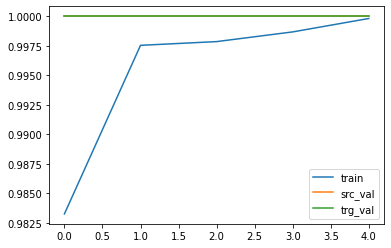

In [ ]:
plt.plot(train_stats['acc'], label = 'train')
plt.plot(src_val_stats['acc'], label = 'src_val')
plt.plot(trg_val_stats['acc'], label = 'trg_val')
plt.legend()
# ALL REACHED 1 AFTER 1st epoch

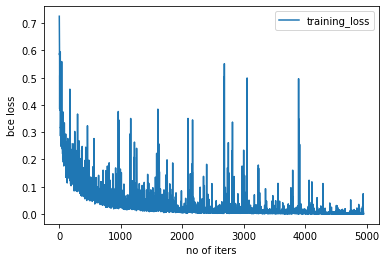

In [ ]:
from statistics import mean
tl = []
tl_mean = []
for l in train_stats['loss']:
  tl.extend(l)
  tl_mean.append(mean(l))

plt.plot(tl, label = 'training_loss')
plt.xlabel('no of iters')
plt.ylabel('bce loss')
plt.legend()

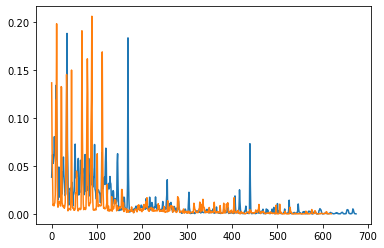

In [ ]:

sv_l = []
tv_l = []
sv_l_mean = []
tv_l_mean = []

for l in src_val_stats['loss']:

  sv_l.extend(l)
  sv_l_mean.append(mean(l))
for l in trg_val_stats['loss']:
  tv_l.extend(l)
  tv_l_mean.append(mean(l))

plt.plot(sv_l, label = 'source_val loss')
plt.plot(tv_l, label = 'trg_val loss')

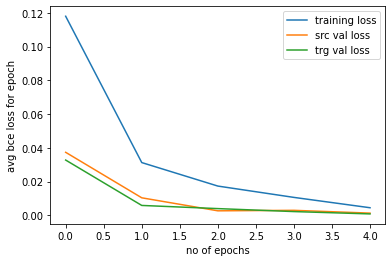

In [ ]:
plt.plot(tl_mean, label = 'training loss')
plt.plot(sv_l_mean, label = 'src val loss')
plt.plot(tv_l_mean, label = 'trg val loss')
plt.xlabel('no of epochs')
plt.ylabel('avg bce loss for epoch')
plt.legend()

In [ ]:
#torch.save(model,'/content/gdrive/MyDrive/VMIA_Lab_Data/GE3/ge3_feature_disc_5epochs.pkl')

# Pre-train entropy disc

In [28]:
def plotting( original, pred, ent):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
  fig.set_size_inches(6, 8, forward=True)
  fig.set_dpi(120)
  fig.tight_layout()
  ax1.imshow(original)
  ax2.imshow(pred)
  ax3.imshow(ent)
  ax1.set_title('original')
  ax2.set_title('pred')
  ax3.set_title('ent')
  #plt.savefig(path + str(current_epoch) + '_' + str(batch_idx))
  plt.pause(0.00001)

In [30]:
def val_disc(curr_epoch, seg_model, disc_model, optimizer, val_loader, device):

  seg_model.eval()
  disc_model.eval()

  val_loss = []
  correct = 0 
  total = 0

  loss = torch.nn.BCELoss()

  for batch_idx, data in enumerate(val_loader):

      original = torch.unsqueeze(data[0], axis = 1).float().to(device)
      label = data[1].float().to(device)

      seg_out, x3 = seg_model(original)

      # CALC ENTROPY
      max_out = torch.where(seg_out >= 0.5, seg_out, 1-seg_out)
      ent_out = -max_out * torch.log2(max_out)
      disc_out = disc_model(ent_out.detach().to(device)).squeeze()

      # CALC LOSS & ACC
      assert disc_out.shape == label.shape
      disc_loss = loss(disc_out, label)

      # APPEND STATS
      val_loss.append(disc_loss.item())
      disc_preds = torch.where(disc_out > 0.5, 1, 0)   
      correct += (label == disc_preds).sum()
      total += len(label)

      if batch_idx % 10 == 0:
        print(curr_epoch,":", batch_idx,"/",len(val_loader), ": VAL BCE loss:", disc_loss.item())

      if batch_idx % 100 == 0:
        plotting(original[0][0].detach().to('cpu'), seg_out[0][0].detach().to('cpu'), ent_out[0][0].detach().to('cpu'))

  acc = (correct/total)*100

  print("VAL EPOCH ACC: ",acc.item())


  return val_loss, acc.item()

In [31]:
def train_disc(curr_epoch, seg_model, disc_model, optimizer, train_loader, device):

  # seg_model.train()
  disc_model.train()

  train_loss = []
  loss = torch.nn.BCELoss()

  correct = 0 
  total = 0

  for batch_idx, data in enumerate(train_loader):

      optimizer.zero_grad()

      original = torch.unsqueeze(data[0].float(), axis = 1).to(device)
      label = data[1].float().to(device)

      seg_out, x3 = seg_model(original)
      
      # CALC ENTROPY
      max_out = torch.where(seg_out >= 0.5, seg_out, 1-seg_out)
      ent_out = -max_out * torch.log2(max_out)
      disc_out = disc_model(ent_out.detach().to(device)).squeeze()

      # CALC LOSS & ACC
      assert disc_out.shape == label.shape
      disc_loss = loss(disc_out, label)

      disc_loss.backward()
      optimizer.step()

      # APPEND STATS
      train_loss.append(disc_loss.item())
      disc_preds = torch.where(disc_out > 0.5, 1, 0)   

      correct += (label == disc_preds).sum()
      total += len(label)
      
      if batch_idx % 10 == 0:
        print(curr_epoch,":", batch_idx,"/",len(train_loader), ": BCE loss:", disc_loss.item())

      if batch_idx % 200 == 0:
        plotting(original[0][0].detach().to('cpu'), seg_out[0][0].detach().to('cpu'), ent_out[0][0].detach().to('cpu'))

      

  acc = (correct/total)*100

  print("EPOCH ACC: ",acc.item() )


  return disc_model, optimizer, train_loss, acc.item()

In [18]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [32]:

#seg_model = UNet2D(1,1).to(device)
seg_model = torch.load('/content/gdrive/MyDrive/VMIA_Lab_Data/GE3/ge3_updateddata_train70_25epochs_combinedloss.pkl',map_location=device)
disc_model = Disc_Entropy().to(device)

optimizer = torch.optim.Adam( disc_model.parameters(), lr = 0.0001 )

train_stats = {'loss':[],'acc':[]}
src_val_stats = {'loss':[], 'acc':[]}
trg_val_stats = {'loss':[], 'acc':[]}


EPOCH:  0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 : 0 / 990 : BCE loss: 0.6889925599098206


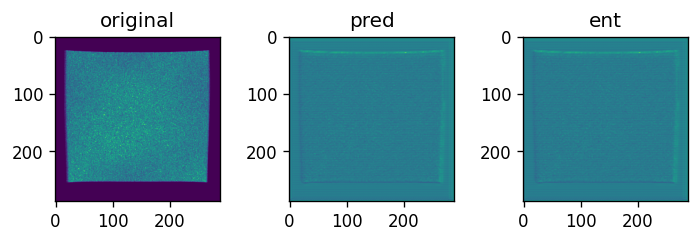

0 : 10 / 990 : BCE loss: 0.697500467300415
0 : 20 / 990 : BCE loss: 0.6934299468994141
0 : 30 / 990 : BCE loss: 0.6887046098709106
0 : 40 / 990 : BCE loss: 0.6933118104934692
0 : 50 / 990 : BCE loss: 0.6864752173423767
0 : 60 / 990 : BCE loss: 0.6973206996917725
0 : 70 / 990 : BCE loss: 0.6854357123374939
0 : 80 / 990 : BCE loss: 0.687336266040802
0 : 90 / 990 : BCE loss: 0.7012783288955688
0 : 100 / 990 : BCE loss: 0.6927387714385986
0 : 110 / 990 : BCE loss: 0.6806944012641907
0 : 120 / 990 : BCE loss: 0.6921412944793701
0 : 130 / 990 : BCE loss: 0.6934875249862671
0 : 140 / 990 : BCE loss: 0.6944103240966797
0 : 150 / 990 : BCE loss: 0.7141557931900024
0 : 160 / 990 : BCE loss: 0.6820662021636963
0 : 170 / 990 : BCE loss: 0.6372267007827759
0 : 180 / 990 : BCE loss: 0.5998592376708984
0 : 190 / 990 : BCE loss: 0.5540226101875305
0 : 200 / 990 : BCE loss: 0.5971062183380127


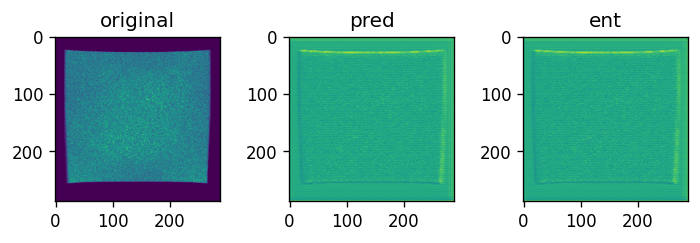

0 : 210 / 990 : BCE loss: 0.485968679189682
0 : 220 / 990 : BCE loss: 0.5735213756561279
0 : 230 / 990 : BCE loss: 0.5071866512298584
0 : 240 / 990 : BCE loss: 0.46624088287353516
0 : 250 / 990 : BCE loss: 0.5078127980232239
0 : 260 / 990 : BCE loss: 0.6518253087997437
0 : 270 / 990 : BCE loss: 0.38868066668510437
0 : 280 / 990 : BCE loss: 0.45378321409225464
0 : 290 / 990 : BCE loss: 0.5964621305465698
0 : 300 / 990 : BCE loss: 0.7005922794342041
0 : 310 / 990 : BCE loss: 0.5121147036552429
0 : 320 / 990 : BCE loss: 0.7720918655395508
0 : 330 / 990 : BCE loss: 0.6104874610900879
0 : 340 / 990 : BCE loss: 0.5886754989624023
0 : 350 / 990 : BCE loss: 0.5476430654525757
0 : 360 / 990 : BCE loss: 0.3281340003013611
0 : 370 / 990 : BCE loss: 0.5725304484367371
0 : 380 / 990 : BCE loss: 0.4627224802970886
0 : 390 / 990 : BCE loss: 0.3818705081939697
0 : 400 / 990 : BCE loss: 0.3567735552787781


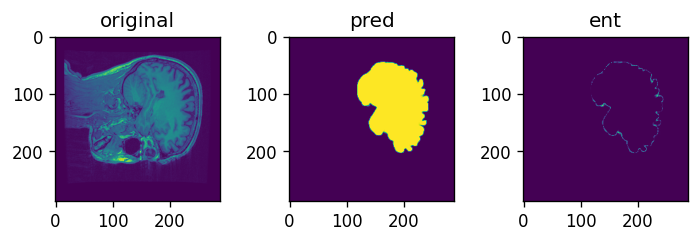

0 : 410 / 990 : BCE loss: 0.5068730115890503
0 : 420 / 990 : BCE loss: 0.355912983417511
0 : 430 / 990 : BCE loss: 0.3035393953323364
0 : 440 / 990 : BCE loss: 0.6475039124488831
0 : 450 / 990 : BCE loss: 0.4924011528491974
0 : 460 / 990 : BCE loss: 0.3147215247154236
0 : 470 / 990 : BCE loss: 1.009609580039978
0 : 480 / 990 : BCE loss: 0.35678866505622864
0 : 490 / 990 : BCE loss: 0.2780134081840515
0 : 500 / 990 : BCE loss: 0.44122210144996643
0 : 510 / 990 : BCE loss: 0.5034595727920532
0 : 520 / 990 : BCE loss: 0.3501930236816406
0 : 530 / 990 : BCE loss: 0.5824273228645325
0 : 540 / 990 : BCE loss: 0.30397316813468933
0 : 550 / 990 : BCE loss: 0.546971321105957
0 : 560 / 990 : BCE loss: 0.35476040840148926
0 : 570 / 990 : BCE loss: 0.4509754776954651
0 : 580 / 990 : BCE loss: 0.35189735889434814
0 : 590 / 990 : BCE loss: 0.35363301634788513
0 : 600 / 990 : BCE loss: 0.2770467698574066


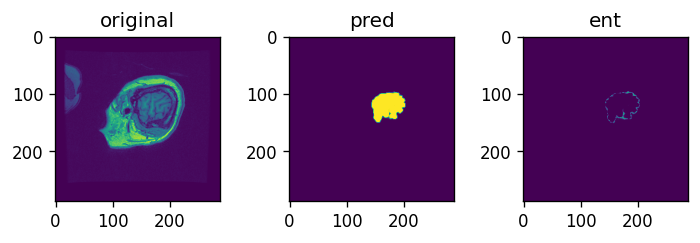

0 : 610 / 990 : BCE loss: 0.37492358684539795
0 : 620 / 990 : BCE loss: 0.3314068913459778
0 : 630 / 990 : BCE loss: 0.4047735929489136
0 : 640 / 990 : BCE loss: 0.28213465213775635
0 : 650 / 990 : BCE loss: 0.4133036136627197
0 : 660 / 990 : BCE loss: 0.3660222887992859
0 : 670 / 990 : BCE loss: 0.5533890724182129
0 : 680 / 990 : BCE loss: 0.48291096091270447
0 : 690 / 990 : BCE loss: 0.3843015432357788
0 : 700 / 990 : BCE loss: 0.2812820076942444
0 : 710 / 990 : BCE loss: 0.3794233798980713
0 : 720 / 990 : BCE loss: 0.2585862874984741
0 : 730 / 990 : BCE loss: 0.3661273121833801
0 : 740 / 990 : BCE loss: 0.47534409165382385
0 : 750 / 990 : BCE loss: 0.27914997935295105
0 : 760 / 990 : BCE loss: 0.5724586844444275
0 : 770 / 990 : BCE loss: 0.30932125449180603
0 : 780 / 990 : BCE loss: 0.3736218214035034
0 : 790 / 990 : BCE loss: 0.498420774936676
0 : 800 / 990 : BCE loss: 0.24574095010757446


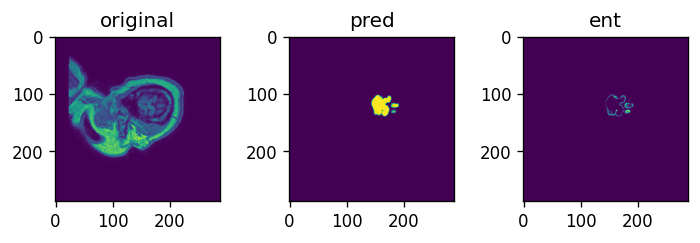

0 : 810 / 990 : BCE loss: 0.5207364559173584
0 : 820 / 990 : BCE loss: 0.3292003870010376
0 : 830 / 990 : BCE loss: 0.41852790117263794
0 : 840 / 990 : BCE loss: 0.31830114126205444
0 : 850 / 990 : BCE loss: 0.543926477432251
0 : 860 / 990 : BCE loss: 0.3003580570220947
0 : 870 / 990 : BCE loss: 0.18966738879680634
0 : 880 / 990 : BCE loss: 0.255111426115036
0 : 890 / 990 : BCE loss: 0.505238950252533
0 : 900 / 990 : BCE loss: 0.3760589063167572
0 : 910 / 990 : BCE loss: 0.20578519999980927
0 : 920 / 990 : BCE loss: 0.3576739430427551
0 : 930 / 990 : BCE loss: 0.6768540740013123
0 : 940 / 990 : BCE loss: 0.23857101798057556
0 : 950 / 990 : BCE loss: 0.32561779022216797
0 : 960 / 990 : BCE loss: 0.2773658037185669
0 : 970 / 990 : BCE loss: 0.4579380750656128
0 : 980 / 990 : BCE loss: 0.47100943326950073
EPOCH ACC:  72.7462158203125

0 : 0 / 135 : VAL BCE loss: 0.5127824544906616


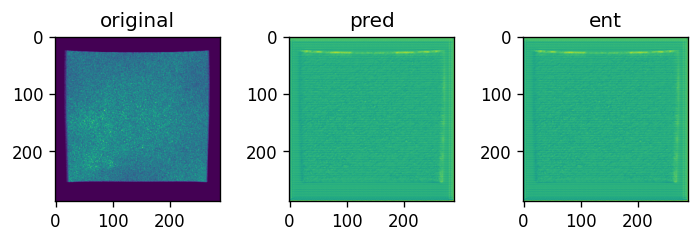

0 : 10 / 135 : VAL BCE loss: 0.5128501653671265
0 : 20 / 135 : VAL BCE loss: 0.008408576250076294
0 : 30 / 135 : VAL BCE loss: 0.004042256623506546
0 : 40 / 135 : VAL BCE loss: 0.00877666100859642
0 : 50 / 135 : VAL BCE loss: 0.5126556158065796
0 : 60 / 135 : VAL BCE loss: 0.5127476453781128
0 : 70 / 135 : VAL BCE loss: 0.38135141134262085
0 : 80 / 135 : VAL BCE loss: 0.3074938952922821
0 : 90 / 135 : VAL BCE loss: 0.9670795202255249
0 : 100 / 135 : VAL BCE loss: 0.4858396053314209


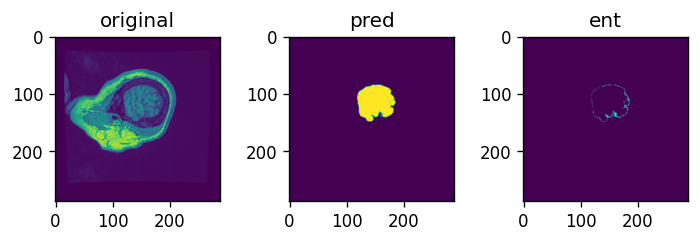

0 : 110 / 135 : VAL BCE loss: 0.5127601623535156
0 : 120 / 135 : VAL BCE loss: 0.6587860584259033
0 : 130 / 135 : VAL BCE loss: 1.5295441150665283
VAL EPOCH ACC:  90.4739761352539

0 : 0 / 124 : VAL BCE loss: 0.913518488407135


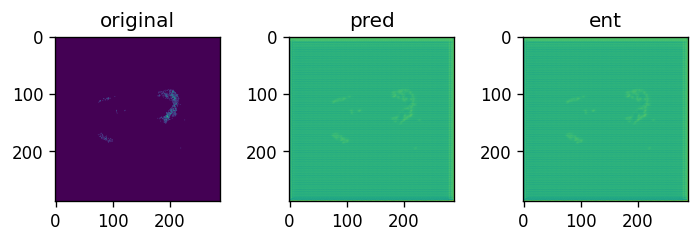

0 : 10 / 124 : VAL BCE loss: 0.8623641729354858
0 : 20 / 124 : VAL BCE loss: 0.149966299533844
0 : 30 / 124 : VAL BCE loss: 1.6164463886525482e-05
0 : 40 / 124 : VAL BCE loss: 0.022346872836351395
0 : 50 / 124 : VAL BCE loss: 0.0007367322687059641
0 : 60 / 124 : VAL BCE loss: 0.010603218339383602
0 : 70 / 124 : VAL BCE loss: 0.0004377230070531368
0 : 80 / 124 : VAL BCE loss: 0.5394067168235779
0 : 90 / 124 : VAL BCE loss: 0.913375198841095
0 : 100 / 124 : VAL BCE loss: 0.9133993983268738


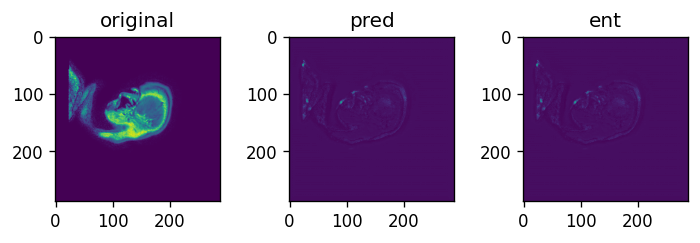

0 : 110 / 124 : VAL BCE loss: 0.11128778010606766
0 : 120 / 124 : VAL BCE loss: 5.0403464229020756e-06
VAL EPOCH ACC:  71.36363983154297

EPOCH:  1
1 : 0 / 990 : BCE loss: 0.3226446509361267


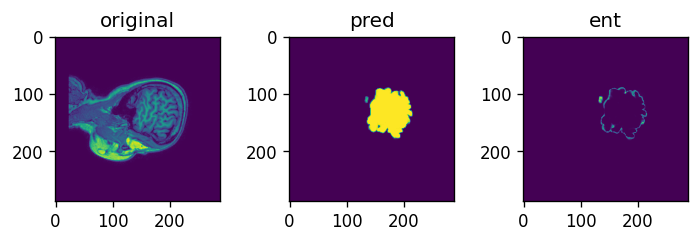

1 : 10 / 990 : BCE loss: 0.44918590784072876
1 : 20 / 990 : BCE loss: 0.3284374177455902
1 : 30 / 990 : BCE loss: 0.43337157368659973
1 : 40 / 990 : BCE loss: 0.4961257874965668
1 : 50 / 990 : BCE loss: 0.33696404099464417
1 : 60 / 990 : BCE loss: 0.2927253544330597
1 : 70 / 990 : BCE loss: 0.11859625577926636
1 : 80 / 990 : BCE loss: 0.359538197517395
1 : 90 / 990 : BCE loss: 0.2482415735721588
1 : 100 / 990 : BCE loss: 0.19746288657188416
1 : 110 / 990 : BCE loss: 0.2624010741710663
1 : 120 / 990 : BCE loss: 0.30825820565223694
1 : 130 / 990 : BCE loss: 0.35598254203796387
1 : 140 / 990 : BCE loss: 0.3113217353820801
1 : 150 / 990 : BCE loss: 0.42781862616539
1 : 160 / 990 : BCE loss: 0.27658841013908386
1 : 170 / 990 : BCE loss: 0.4423496723175049
1 : 180 / 990 : BCE loss: 0.17225880920886993
1 : 190 / 990 : BCE loss: 0.29591405391693115
1 : 200 / 990 : BCE loss: 0.4513775110244751


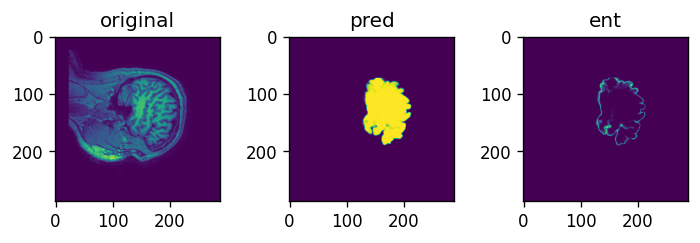

1 : 210 / 990 : BCE loss: 0.7836620807647705
1 : 220 / 990 : BCE loss: 0.6258412599563599
1 : 230 / 990 : BCE loss: 0.21089130640029907
1 : 240 / 990 : BCE loss: 0.28711941838264465
1 : 250 / 990 : BCE loss: 0.3693445324897766
1 : 260 / 990 : BCE loss: 0.4248095154762268
1 : 270 / 990 : BCE loss: 0.3288905918598175
1 : 280 / 990 : BCE loss: 0.3098236918449402
1 : 290 / 990 : BCE loss: 0.36915817856788635
1 : 300 / 990 : BCE loss: 0.3277515172958374
1 : 310 / 990 : BCE loss: 0.3134590983390808
1 : 320 / 990 : BCE loss: 0.35352087020874023
1 : 330 / 990 : BCE loss: 0.26261451840400696
1 : 340 / 990 : BCE loss: 0.2377524971961975
1 : 350 / 990 : BCE loss: 0.2812548279762268
1 : 360 / 990 : BCE loss: 0.2934896945953369
1 : 370 / 990 : BCE loss: 0.5972853302955627
1 : 380 / 990 : BCE loss: 0.2811480462551117
1 : 390 / 990 : BCE loss: 0.2899908721446991
1 : 400 / 990 : BCE loss: 0.2688715159893036


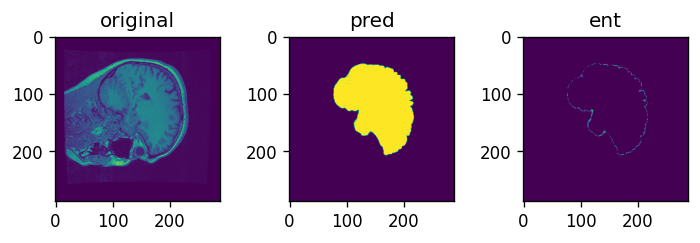

1 : 410 / 990 : BCE loss: 0.30536776781082153
1 : 420 / 990 : BCE loss: 0.4287606179714203
1 : 430 / 990 : BCE loss: 0.30291301012039185
1 : 440 / 990 : BCE loss: 0.16863210499286652
1 : 450 / 990 : BCE loss: 0.2250727117061615
1 : 460 / 990 : BCE loss: 0.21736401319503784
1 : 470 / 990 : BCE loss: 0.2845938205718994
1 : 480 / 990 : BCE loss: 0.14988675713539124
1 : 490 / 990 : BCE loss: 0.33025407791137695
1 : 500 / 990 : BCE loss: 0.3567178249359131
1 : 510 / 990 : BCE loss: 0.3347207009792328
1 : 520 / 990 : BCE loss: 0.3318145275115967
1 : 530 / 990 : BCE loss: 0.42631351947784424
1 : 540 / 990 : BCE loss: 0.33637404441833496
1 : 550 / 990 : BCE loss: 0.25782203674316406
1 : 560 / 990 : BCE loss: 0.2788997292518616
1 : 570 / 990 : BCE loss: 0.4186858534812927
1 : 580 / 990 : BCE loss: 0.22731851041316986
1 : 590 / 990 : BCE loss: 0.2786429822444916
1 : 600 / 990 : BCE loss: 0.5296869277954102


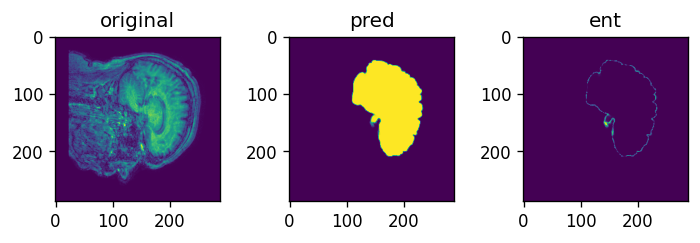

1 : 610 / 990 : BCE loss: 0.17915703356266022
1 : 620 / 990 : BCE loss: 0.40873706340789795
1 : 630 / 990 : BCE loss: 0.17997625470161438
1 : 640 / 990 : BCE loss: 0.3188954293727875
1 : 650 / 990 : BCE loss: 0.5638477206230164
1 : 660 / 990 : BCE loss: 0.3125047981739044
1 : 670 / 990 : BCE loss: 0.3302064538002014
1 : 680 / 990 : BCE loss: 0.14082875847816467
1 : 690 / 990 : BCE loss: 0.1536140739917755
1 : 700 / 990 : BCE loss: 0.2921387553215027
1 : 710 / 990 : BCE loss: 0.2528679072856903
1 : 720 / 990 : BCE loss: 0.17787128686904907
1 : 730 / 990 : BCE loss: 0.282038152217865
1 : 740 / 990 : BCE loss: 0.3416370153427124
1 : 750 / 990 : BCE loss: 0.18663647770881653
1 : 760 / 990 : BCE loss: 0.24194777011871338
1 : 770 / 990 : BCE loss: 0.29378682374954224
1 : 780 / 990 : BCE loss: 0.2688245177268982
1 : 790 / 990 : BCE loss: 0.13782507181167603
1 : 800 / 990 : BCE loss: 0.2519712746143341


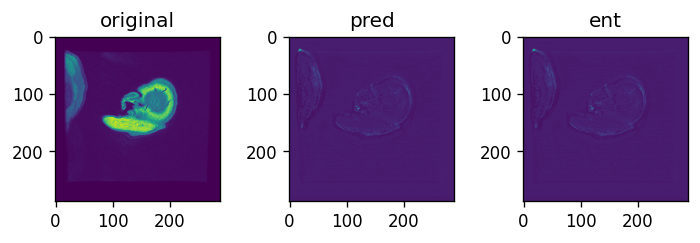

1 : 810 / 990 : BCE loss: 0.36849093437194824
1 : 820 / 990 : BCE loss: 0.2580164074897766
1 : 830 / 990 : BCE loss: 0.1904650777578354
1 : 840 / 990 : BCE loss: 0.3318193554878235
1 : 850 / 990 : BCE loss: 0.5355460047721863
1 : 860 / 990 : BCE loss: 0.31283870339393616
1 : 870 / 990 : BCE loss: 0.45707905292510986
1 : 880 / 990 : BCE loss: 0.296569287776947
1 : 890 / 990 : BCE loss: 0.2624034881591797
1 : 900 / 990 : BCE loss: 0.3261556625366211
1 : 910 / 990 : BCE loss: 0.3056347966194153
1 : 920 / 990 : BCE loss: 0.17660006880760193
1 : 930 / 990 : BCE loss: 0.23685747385025024
1 : 940 / 990 : BCE loss: 0.3533700108528137
1 : 950 / 990 : BCE loss: 0.2938975393772125
1 : 960 / 990 : BCE loss: 0.19276000559329987
1 : 970 / 990 : BCE loss: 0.22425100207328796
1 : 980 / 990 : BCE loss: 0.3555888235569
EPOCH ACC:  82.03282928466797

1 : 0 / 135 : VAL BCE loss: 0.5558168888092041


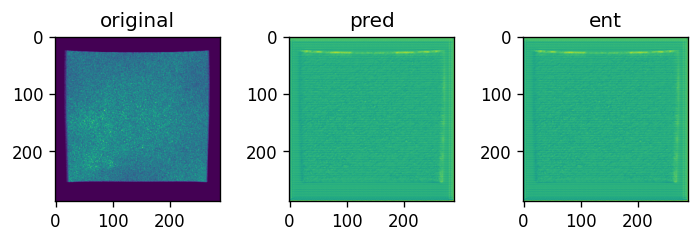

1 : 10 / 135 : VAL BCE loss: 0.28022491931915283
1 : 20 / 135 : VAL BCE loss: 0.0019421109464019537
1 : 30 / 135 : VAL BCE loss: 8.171385707100853e-05
1 : 40 / 135 : VAL BCE loss: 0.00048758386401459575
1 : 50 / 135 : VAL BCE loss: 0.5557606816291809
1 : 60 / 135 : VAL BCE loss: 0.5558260679244995
1 : 70 / 135 : VAL BCE loss: 0.3997744917869568
1 : 80 / 135 : VAL BCE loss: 0.027048442512750626
1 : 90 / 135 : VAL BCE loss: 0.5047065019607544
1 : 100 / 135 : VAL BCE loss: 0.07523585110902786


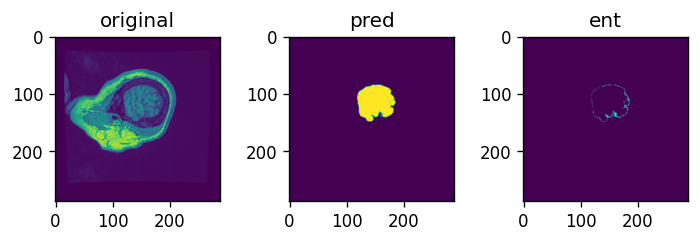

1 : 110 / 135 : VAL BCE loss: 0.5558381080627441
1 : 120 / 135 : VAL BCE loss: 0.6801595687866211
1 : 130 / 135 : VAL BCE loss: 0.6115292310714722
VAL EPOCH ACC:  94.9349365234375

1 : 0 / 124 : VAL BCE loss: 0.8524138927459717


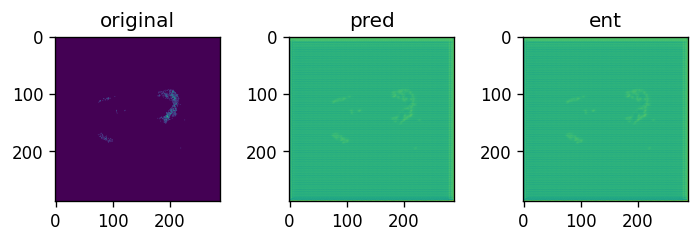

1 : 10 / 124 : VAL BCE loss: 0.7823494672775269
1 : 20 / 124 : VAL BCE loss: 0.2051478922367096
1 : 30 / 124 : VAL BCE loss: 8.195640077701682e-08
1 : 40 / 124 : VAL BCE loss: 0.0045029232278466225
1 : 50 / 124 : VAL BCE loss: 0.0006818167166784406
1 : 60 / 124 : VAL BCE loss: 0.006607136223465204
1 : 70 / 124 : VAL BCE loss: 0.00021654460579156876
1 : 80 / 124 : VAL BCE loss: 0.45061469078063965
1 : 90 / 124 : VAL BCE loss: 0.8523663282394409
1 : 100 / 124 : VAL BCE loss: 0.8523623943328857


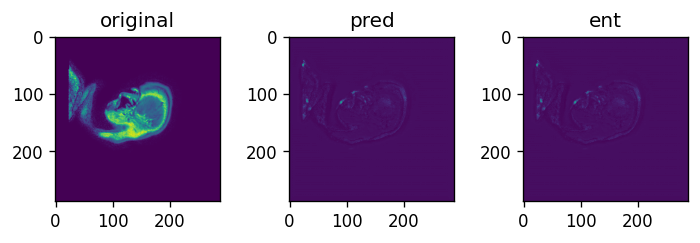

1 : 110 / 124 : VAL BCE loss: 0.020425254479050636
1 : 120 / 124 : VAL BCE loss: 2.2351741790771484e-08
VAL EPOCH ACC:  69.29293060302734

EPOCH:  2
2 : 0 / 990 : BCE loss: 0.3298671841621399


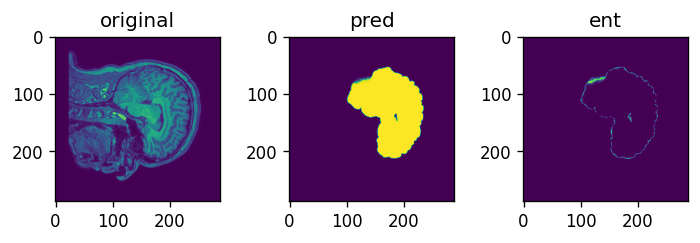

2 : 10 / 990 : BCE loss: 0.34765899181365967
2 : 20 / 990 : BCE loss: 0.20250289142131805
2 : 30 / 990 : BCE loss: 0.34225863218307495
2 : 40 / 990 : BCE loss: 0.2236141860485077
2 : 50 / 990 : BCE loss: 0.3948653042316437
2 : 60 / 990 : BCE loss: 0.27189111709594727
2 : 70 / 990 : BCE loss: 0.41135963797569275
2 : 80 / 990 : BCE loss: 0.28898489475250244
2 : 90 / 990 : BCE loss: 0.2930152416229248
2 : 100 / 990 : BCE loss: 0.3047654628753662
2 : 110 / 990 : BCE loss: 0.38905513286590576
2 : 120 / 990 : BCE loss: 0.2778228521347046
2 : 130 / 990 : BCE loss: 0.11587740480899811
2 : 140 / 990 : BCE loss: 0.2788330018520355
2 : 150 / 990 : BCE loss: 0.6741437315940857
2 : 160 / 990 : BCE loss: 0.16464407742023468
2 : 170 / 990 : BCE loss: 0.34104806184768677
2 : 180 / 990 : BCE loss: 0.31106314063072205
2 : 190 / 990 : BCE loss: 0.16871681809425354
2 : 200 / 990 : BCE loss: 0.2769293487071991


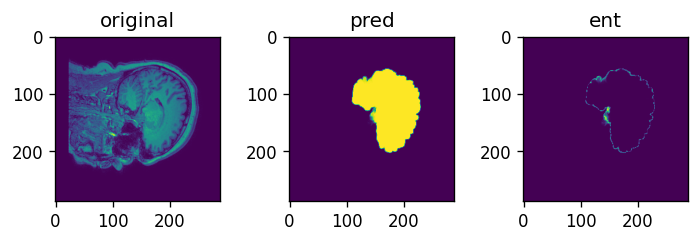

2 : 210 / 990 : BCE loss: 0.4743613004684448
2 : 220 / 990 : BCE loss: 0.26934903860092163
2 : 230 / 990 : BCE loss: 0.29736584424972534
2 : 240 / 990 : BCE loss: 0.1667461395263672
2 : 250 / 990 : BCE loss: 0.45280206203460693
2 : 260 / 990 : BCE loss: 0.3504602909088135
2 : 270 / 990 : BCE loss: 0.220794677734375
2 : 280 / 990 : BCE loss: 0.2777273952960968
2 : 290 / 990 : BCE loss: 0.6645970940589905
2 : 300 / 990 : BCE loss: 0.32057151198387146
2 : 310 / 990 : BCE loss: 0.15437644720077515
2 : 320 / 990 : BCE loss: 0.2676336467266083
2 : 330 / 990 : BCE loss: 0.2040857970714569
2 : 340 / 990 : BCE loss: 0.728579580783844
2 : 350 / 990 : BCE loss: 0.17502953112125397
2 : 360 / 990 : BCE loss: 0.35420265793800354
2 : 370 / 990 : BCE loss: 0.1618047058582306
2 : 380 / 990 : BCE loss: 0.30603456497192383
2 : 390 / 990 : BCE loss: 0.3389583230018616
2 : 400 / 990 : BCE loss: 0.31904956698417664


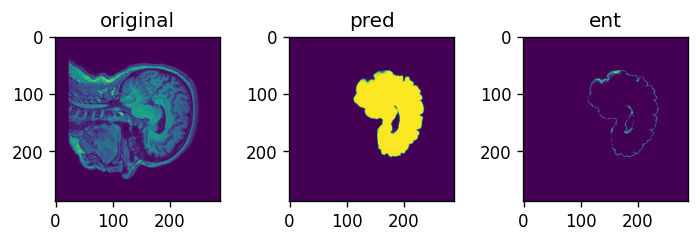

2 : 410 / 990 : BCE loss: 0.3353673815727234
2 : 420 / 990 : BCE loss: 0.35846835374832153
2 : 430 / 990 : BCE loss: 0.2892224192619324
2 : 440 / 990 : BCE loss: 0.15702451765537262
2 : 450 / 990 : BCE loss: 0.3246728777885437
2 : 460 / 990 : BCE loss: 0.2964268624782562
2 : 470 / 990 : BCE loss: 0.23516225814819336
2 : 480 / 990 : BCE loss: 0.46790826320648193
2 : 490 / 990 : BCE loss: 0.24499130249023438
2 : 500 / 990 : BCE loss: 0.427776962518692
2 : 510 / 990 : BCE loss: 0.32595503330230713
2 : 520 / 990 : BCE loss: 0.3298649191856384
2 : 530 / 990 : BCE loss: 0.2368519902229309
2 : 540 / 990 : BCE loss: 0.19639840722084045
2 : 550 / 990 : BCE loss: 0.3156193494796753
2 : 560 / 990 : BCE loss: 0.23744666576385498
2 : 570 / 990 : BCE loss: 0.2761681377887726
2 : 580 / 990 : BCE loss: 0.26964616775512695
2 : 590 / 990 : BCE loss: 0.23467281460762024
2 : 600 / 990 : BCE loss: 0.4211224913597107


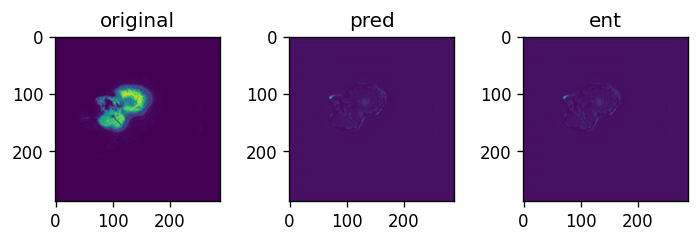

2 : 610 / 990 : BCE loss: 0.3573830723762512
2 : 620 / 990 : BCE loss: 0.2875969111919403
2 : 630 / 990 : BCE loss: 0.2261928766965866
2 : 640 / 990 : BCE loss: 0.16461996734142303
2 : 650 / 990 : BCE loss: 0.08440222591161728
2 : 660 / 990 : BCE loss: 0.18567343056201935
2 : 670 / 990 : BCE loss: 0.3069554269313812
2 : 680 / 990 : BCE loss: 0.21340611577033997
2 : 690 / 990 : BCE loss: 0.5653988122940063
2 : 700 / 990 : BCE loss: 0.26199305057525635
2 : 710 / 990 : BCE loss: 0.21397793292999268
2 : 720 / 990 : BCE loss: 0.24893666803836823
2 : 730 / 990 : BCE loss: 0.10838790982961655
2 : 740 / 990 : BCE loss: 0.12986189126968384
2 : 750 / 990 : BCE loss: 0.39031946659088135
2 : 760 / 990 : BCE loss: 0.30329859256744385
2 : 770 / 990 : BCE loss: 0.15356877446174622
2 : 780 / 990 : BCE loss: 0.4071817994117737
2 : 790 / 990 : BCE loss: 0.1459040343761444
2 : 800 / 990 : BCE loss: 0.4760638475418091


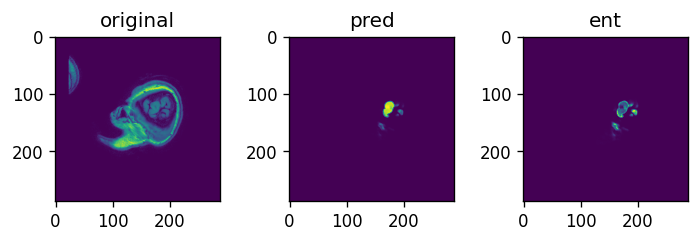

2 : 810 / 990 : BCE loss: 0.3198772072792053
2 : 820 / 990 : BCE loss: 0.242752805352211
2 : 830 / 990 : BCE loss: 0.4213660955429077
2 : 840 / 990 : BCE loss: 0.1441487967967987
2 : 850 / 990 : BCE loss: 0.21303167939186096
2 : 860 / 990 : BCE loss: 0.10457821190357208
2 : 870 / 990 : BCE loss: 0.22931087017059326
2 : 880 / 990 : BCE loss: 0.28325843811035156
2 : 890 / 990 : BCE loss: 0.2330198585987091
2 : 900 / 990 : BCE loss: 0.3234720230102539
2 : 910 / 990 : BCE loss: 0.2724669575691223
2 : 920 / 990 : BCE loss: 0.3679312467575073
2 : 930 / 990 : BCE loss: 0.26008135080337524
2 : 940 / 990 : BCE loss: 0.33359619975090027
2 : 950 / 990 : BCE loss: 0.2297677993774414
2 : 960 / 990 : BCE loss: 0.09211397171020508
2 : 970 / 990 : BCE loss: 0.0037692540790885687
2 : 980 / 990 : BCE loss: 0.18002167344093323
EPOCH ACC:  83.89520263671875

2 : 0 / 135 : VAL BCE loss: 0.5731183290481567


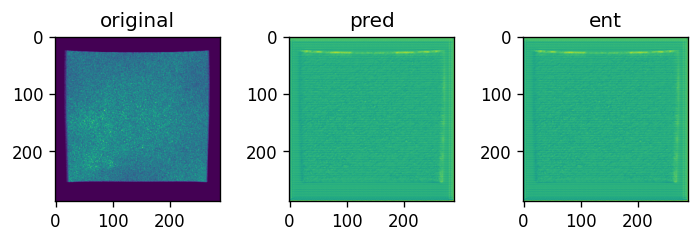

2 : 10 / 135 : VAL BCE loss: 0.20578816533088684
2 : 20 / 135 : VAL BCE loss: 0.0006075705168768764
2 : 30 / 135 : VAL BCE loss: 6.854593266325537e-06
2 : 40 / 135 : VAL BCE loss: 0.00013105591642670333
2 : 50 / 135 : VAL BCE loss: 0.5729674100875854
2 : 60 / 135 : VAL BCE loss: 0.5731223225593567
2 : 70 / 135 : VAL BCE loss: 0.27129748463630676
2 : 80 / 135 : VAL BCE loss: 0.040573228150606155
2 : 90 / 135 : VAL BCE loss: 0.5618134140968323
2 : 100 / 135 : VAL BCE loss: 0.01647474616765976


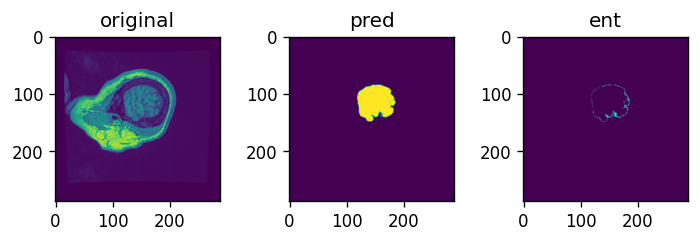

2 : 110 / 135 : VAL BCE loss: 0.5731464624404907
2 : 120 / 135 : VAL BCE loss: 0.5688572525978088
2 : 130 / 135 : VAL BCE loss: 0.4263714551925659
VAL EPOCH ACC:  95.77136993408203

2 : 0 / 124 : VAL BCE loss: 0.8295743465423584


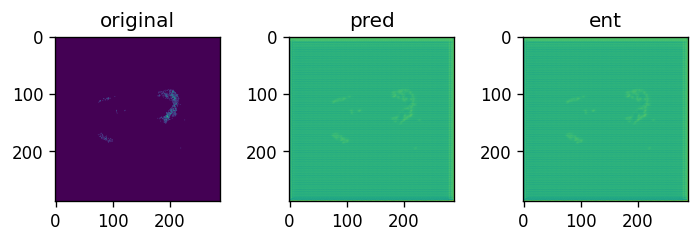

2 : 10 / 124 : VAL BCE loss: 0.7773160934448242
2 : 20 / 124 : VAL BCE loss: 0.23903633654117584
2 : 30 / 124 : VAL BCE loss: 1.7471800219936995e-06
2 : 40 / 124 : VAL BCE loss: 0.002780996495857835
2 : 50 / 124 : VAL BCE loss: 0.00020104084978811443
2 : 60 / 124 : VAL BCE loss: 0.002492093713954091
2 : 70 / 124 : VAL BCE loss: 0.0025192140601575375
2 : 80 / 124 : VAL BCE loss: 0.4443572461605072
2 : 90 / 124 : VAL BCE loss: 0.8295595645904541
2 : 100 / 124 : VAL BCE loss: 0.8295597434043884


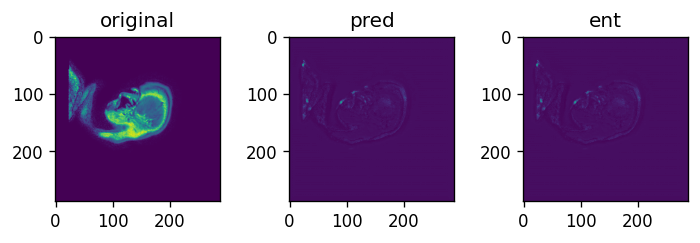

2 : 110 / 124 : VAL BCE loss: 0.006408083718270063
2 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  68.48484802246094

EPOCH:  3
3 : 0 / 990 : BCE loss: 0.3830481767654419


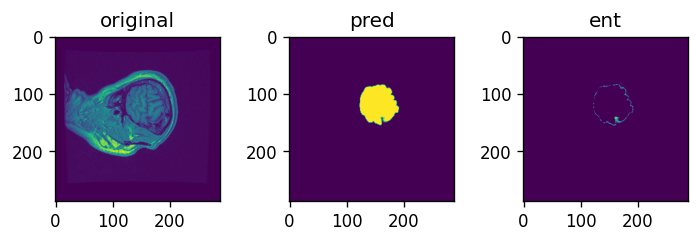

3 : 10 / 990 : BCE loss: 0.32753509283065796
3 : 20 / 990 : BCE loss: 0.28593236207962036
3 : 30 / 990 : BCE loss: 0.3107670545578003
3 : 40 / 990 : BCE loss: 0.46360546350479126
3 : 50 / 990 : BCE loss: 0.22357070446014404
3 : 60 / 990 : BCE loss: 0.17773017287254333
3 : 70 / 990 : BCE loss: 0.23638927936553955
3 : 80 / 990 : BCE loss: 0.16148672997951508
3 : 90 / 990 : BCE loss: 0.15738072991371155
3 : 100 / 990 : BCE loss: 0.18020682036876678
3 : 110 / 990 : BCE loss: 0.377098023891449
3 : 120 / 990 : BCE loss: 0.40899351239204407
3 : 130 / 990 : BCE loss: 0.13419774174690247
3 : 140 / 990 : BCE loss: 0.2138848900794983
3 : 150 / 990 : BCE loss: 0.35484468936920166
3 : 160 / 990 : BCE loss: 0.2524905800819397
3 : 170 / 990 : BCE loss: 0.2549387514591217
3 : 180 / 990 : BCE loss: 0.31499558687210083
3 : 190 / 990 : BCE loss: 0.47893238067626953
3 : 200 / 990 : BCE loss: 0.38702285289764404


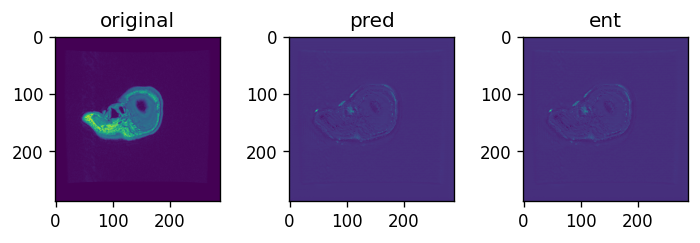

3 : 210 / 990 : BCE loss: 0.2984781861305237
3 : 220 / 990 : BCE loss: 0.45569145679473877
3 : 230 / 990 : BCE loss: 0.1704275906085968
3 : 240 / 990 : BCE loss: 0.11987298727035522
3 : 250 / 990 : BCE loss: 0.1347685158252716
3 : 260 / 990 : BCE loss: 0.3128686845302582
3 : 270 / 990 : BCE loss: 0.2647252082824707
3 : 280 / 990 : BCE loss: 0.17422911524772644
3 : 290 / 990 : BCE loss: 0.28083115816116333
3 : 300 / 990 : BCE loss: 0.144459068775177
3 : 310 / 990 : BCE loss: 0.3457917869091034
3 : 320 / 990 : BCE loss: 0.1439003199338913
3 : 330 / 990 : BCE loss: 0.18195819854736328
3 : 340 / 990 : BCE loss: 0.13396459817886353
3 : 350 / 990 : BCE loss: 0.20505204796791077
3 : 360 / 990 : BCE loss: 0.3818455636501312
3 : 370 / 990 : BCE loss: 0.1887156367301941
3 : 380 / 990 : BCE loss: 0.18047074973583221
3 : 390 / 990 : BCE loss: 0.26334479451179504
3 : 400 / 990 : BCE loss: 0.21946191787719727


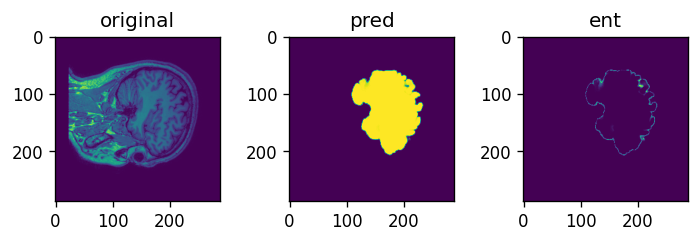

3 : 410 / 990 : BCE loss: 0.3994465172290802
3 : 420 / 990 : BCE loss: 0.40685421228408813
3 : 430 / 990 : BCE loss: 0.3248285949230194
3 : 440 / 990 : BCE loss: 0.3341856002807617
3 : 450 / 990 : BCE loss: 0.299260675907135
3 : 460 / 990 : BCE loss: 0.2393583357334137
3 : 470 / 990 : BCE loss: 0.147552028298378
3 : 480 / 990 : BCE loss: 0.294362336397171
3 : 490 / 990 : BCE loss: 0.4946773648262024
3 : 500 / 990 : BCE loss: 0.23929177224636078
3 : 510 / 990 : BCE loss: 0.46091949939727783
3 : 520 / 990 : BCE loss: 0.4452694058418274
3 : 530 / 990 : BCE loss: 0.24079731106758118
3 : 540 / 990 : BCE loss: 0.10750552266836166
3 : 550 / 990 : BCE loss: 0.2612338662147522
3 : 560 / 990 : BCE loss: 0.3287760019302368
3 : 570 / 990 : BCE loss: 0.2237217128276825
3 : 580 / 990 : BCE loss: 0.3202362656593323
3 : 590 / 990 : BCE loss: 0.1342725157737732
3 : 600 / 990 : BCE loss: 0.1264193207025528


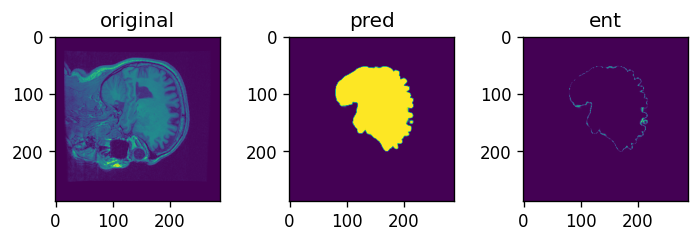

3 : 610 / 990 : BCE loss: 0.35258948802948
3 : 620 / 990 : BCE loss: 0.21403421461582184
3 : 630 / 990 : BCE loss: 0.24043619632720947
3 : 640 / 990 : BCE loss: 0.3460983633995056
3 : 650 / 990 : BCE loss: 0.22055405378341675
3 : 660 / 990 : BCE loss: 0.2593054175376892
3 : 670 / 990 : BCE loss: 0.3191738724708557
3 : 680 / 990 : BCE loss: 0.39267247915267944
3 : 690 / 990 : BCE loss: 0.43956032395362854
3 : 700 / 990 : BCE loss: 0.11274202167987823
3 : 710 / 990 : BCE loss: 0.2256399393081665
3 : 720 / 990 : BCE loss: 0.20519086718559265
3 : 730 / 990 : BCE loss: 0.43432050943374634
3 : 740 / 990 : BCE loss: 0.22583544254302979
3 : 750 / 990 : BCE loss: 0.3272857666015625
3 : 760 / 990 : BCE loss: 0.22830252349376678
3 : 770 / 990 : BCE loss: 0.1792040318250656
3 : 780 / 990 : BCE loss: 0.18749094009399414
3 : 790 / 990 : BCE loss: 0.19129177927970886
3 : 800 / 990 : BCE loss: 0.1829783320426941


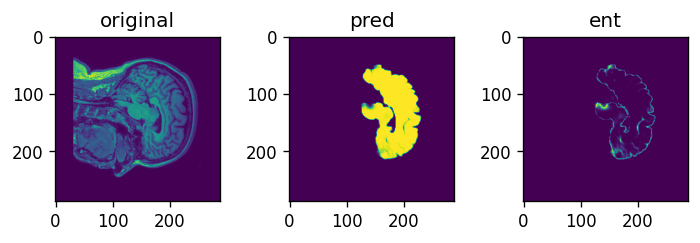

3 : 810 / 990 : BCE loss: 0.20019486546516418
3 : 820 / 990 : BCE loss: 0.3326546847820282
3 : 830 / 990 : BCE loss: 0.2110866904258728
3 : 840 / 990 : BCE loss: 0.24836546182632446
3 : 850 / 990 : BCE loss: 0.33299386501312256
3 : 860 / 990 : BCE loss: 0.23513692617416382
3 : 870 / 990 : BCE loss: 0.24157372117042542
3 : 880 / 990 : BCE loss: 0.18153488636016846
3 : 890 / 990 : BCE loss: 0.23479396104812622
3 : 900 / 990 : BCE loss: 0.29454970359802246
3 : 910 / 990 : BCE loss: 0.12680472433567047
3 : 920 / 990 : BCE loss: 0.817870557308197
3 : 930 / 990 : BCE loss: 0.5753325819969177
3 : 940 / 990 : BCE loss: 0.22830331325531006
3 : 950 / 990 : BCE loss: 0.26464027166366577
3 : 960 / 990 : BCE loss: 0.21555517613887787
3 : 970 / 990 : BCE loss: 0.26464715600013733
3 : 980 / 990 : BCE loss: 0.3850329518318176
EPOCH ACC:  84.7601089477539

3 : 0 / 135 : VAL BCE loss: 0.5941388607025146


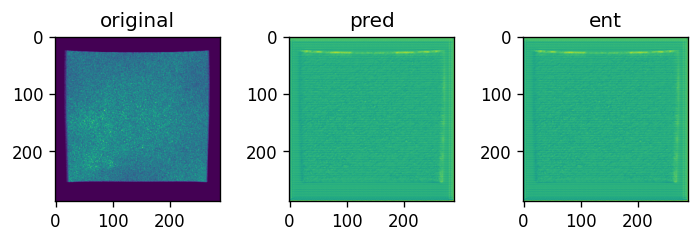

3 : 10 / 135 : VAL BCE loss: 0.3208855986595154
3 : 20 / 135 : VAL BCE loss: 0.001374249579384923
3 : 30 / 135 : VAL BCE loss: 0.0001342118630418554
3 : 40 / 135 : VAL BCE loss: 0.00010148057481274009
3 : 50 / 135 : VAL BCE loss: 0.594049334526062
3 : 60 / 135 : VAL BCE loss: 0.5941354036331177
3 : 70 / 135 : VAL BCE loss: 0.6096782088279724
3 : 80 / 135 : VAL BCE loss: 0.06907415390014648
3 : 90 / 135 : VAL BCE loss: 2.930968761444092
3 : 100 / 135 : VAL BCE loss: 0.013682983815670013


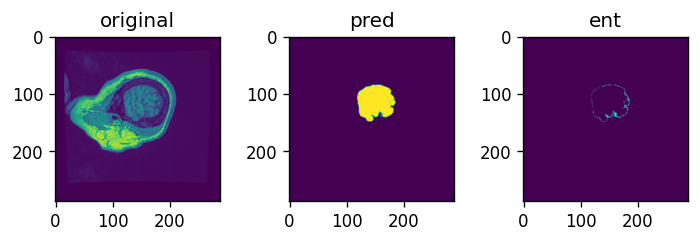

3 : 110 / 135 : VAL BCE loss: 0.5941417217254639
3 : 120 / 135 : VAL BCE loss: 0.8935500383377075
3 : 130 / 135 : VAL BCE loss: 1.7485123872756958
VAL EPOCH ACC:  88.52230072021484

3 : 0 / 124 : VAL BCE loss: 0.8030438423156738


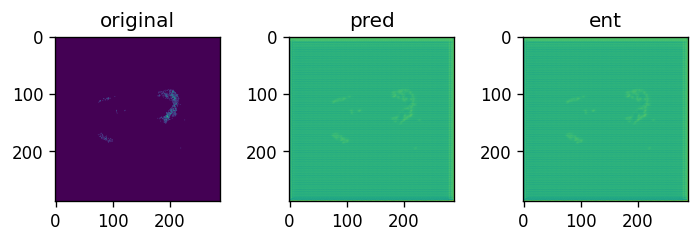

3 : 10 / 124 : VAL BCE loss: 0.6843574047088623
3 : 20 / 124 : VAL BCE loss: 0.058163609355688095
3 : 30 / 124 : VAL BCE loss: 2.2351745343485163e-08
3 : 40 / 124 : VAL BCE loss: 0.0002780335780698806
3 : 50 / 124 : VAL BCE loss: 1.8701084627537057e-06
3 : 60 / 124 : VAL BCE loss: 3.4347979180893162e-06
3 : 70 / 124 : VAL BCE loss: 0.02416158653795719
3 : 80 / 124 : VAL BCE loss: 0.3180108964443207
3 : 90 / 124 : VAL BCE loss: 0.8030400276184082
3 : 100 / 124 : VAL BCE loss: 0.8030389547348022


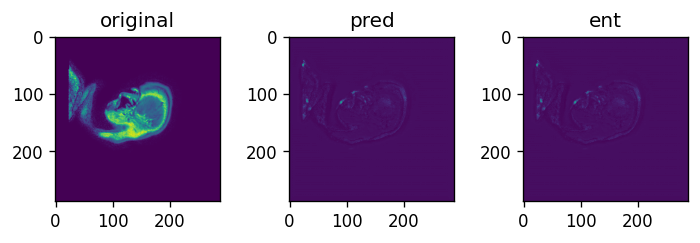

3 : 110 / 124 : VAL BCE loss: 0.0008498203242197633
3 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  72.17171478271484

EPOCH:  4
4 : 0 / 990 : BCE loss: 0.2042311728000641


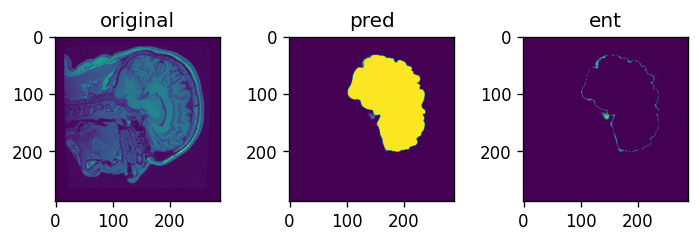

4 : 10 / 990 : BCE loss: 0.336635947227478
4 : 20 / 990 : BCE loss: 0.09269281476736069
4 : 30 / 990 : BCE loss: 0.37381216883659363
4 : 40 / 990 : BCE loss: 0.27603834867477417
4 : 50 / 990 : BCE loss: 0.3488929867744446
4 : 60 / 990 : BCE loss: 0.2741871178150177
4 : 70 / 990 : BCE loss: 0.35325324535369873
4 : 80 / 990 : BCE loss: 0.26439952850341797
4 : 90 / 990 : BCE loss: 0.39123278856277466
4 : 100 / 990 : BCE loss: 0.174937903881073
4 : 110 / 990 : BCE loss: 0.08898862451314926
4 : 120 / 990 : BCE loss: 0.36863794922828674
4 : 130 / 990 : BCE loss: 0.04077000916004181
4 : 140 / 990 : BCE loss: 0.35226863622665405
4 : 150 / 990 : BCE loss: 0.16425029933452606
4 : 160 / 990 : BCE loss: 0.23335382342338562
4 : 170 / 990 : BCE loss: 0.2126268744468689
4 : 180 / 990 : BCE loss: 0.1803743839263916
4 : 190 / 990 : BCE loss: 0.3050363063812256
4 : 200 / 990 : BCE loss: 0.20465993881225586


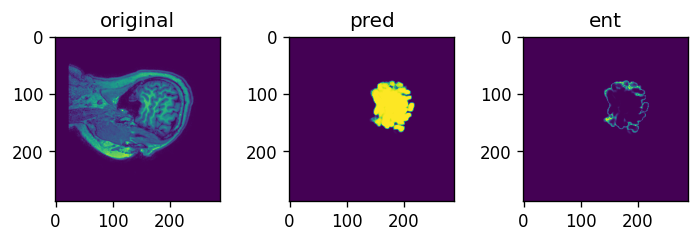

4 : 210 / 990 : BCE loss: 0.3072664141654968
4 : 220 / 990 : BCE loss: 0.3001707196235657
4 : 230 / 990 : BCE loss: 0.23097333312034607
4 : 240 / 990 : BCE loss: 0.10476090013980865
4 : 250 / 990 : BCE loss: 0.27038249373435974
4 : 260 / 990 : BCE loss: 0.27463239431381226
4 : 270 / 990 : BCE loss: 0.25695669651031494
4 : 280 / 990 : BCE loss: 0.23467999696731567
4 : 290 / 990 : BCE loss: 0.3056558072566986
4 : 300 / 990 : BCE loss: 0.19034770131111145
4 : 310 / 990 : BCE loss: 0.1614644080400467
4 : 320 / 990 : BCE loss: 0.20946002006530762
4 : 330 / 990 : BCE loss: 0.23797887563705444
4 : 340 / 990 : BCE loss: 0.1275663673877716
4 : 350 / 990 : BCE loss: 0.19630515575408936
4 : 360 / 990 : BCE loss: 0.2545849084854126
4 : 370 / 990 : BCE loss: 0.2938276529312134
4 : 380 / 990 : BCE loss: 0.1770191490650177
4 : 390 / 990 : BCE loss: 0.002938280813395977
4 : 400 / 990 : BCE loss: 0.29324871301651


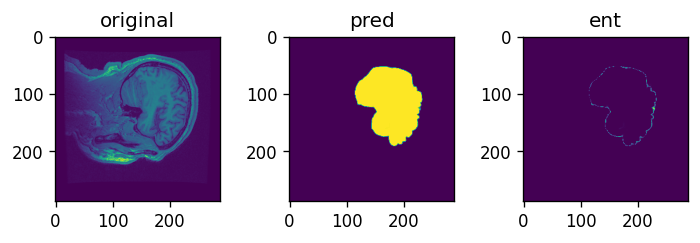

4 : 410 / 990 : BCE loss: 0.445568710565567
4 : 420 / 990 : BCE loss: 0.31807011365890503
4 : 430 / 990 : BCE loss: 0.32048940658569336
4 : 440 / 990 : BCE loss: 0.24508193135261536
4 : 450 / 990 : BCE loss: 0.3471604883670807
4 : 460 / 990 : BCE loss: 0.2801312208175659
4 : 470 / 990 : BCE loss: 0.33756983280181885
4 : 480 / 990 : BCE loss: 0.3243330717086792
4 : 490 / 990 : BCE loss: 0.22772768139839172
4 : 500 / 990 : BCE loss: 0.37682098150253296
4 : 510 / 990 : BCE loss: 0.24670086801052094
4 : 520 / 990 : BCE loss: 0.36001479625701904
4 : 530 / 990 : BCE loss: 0.37431055307388306
4 : 540 / 990 : BCE loss: 0.2014225274324417
4 : 550 / 990 : BCE loss: 0.14309898018836975
4 : 560 / 990 : BCE loss: 0.24109092354774475
4 : 570 / 990 : BCE loss: 0.09013425558805466
4 : 580 / 990 : BCE loss: 0.17563775181770325
4 : 590 / 990 : BCE loss: 0.1465822011232376
4 : 600 / 990 : BCE loss: 0.4513053297996521


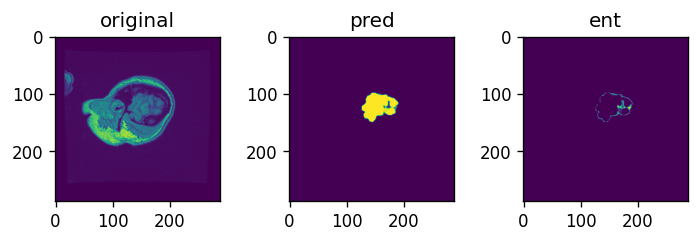

4 : 610 / 990 : BCE loss: 0.3063165247440338
4 : 620 / 990 : BCE loss: 0.3070065975189209
4 : 630 / 990 : BCE loss: 0.3796067237854004
4 : 640 / 990 : BCE loss: 0.17810943722724915
4 : 650 / 990 : BCE loss: 0.21498963236808777
4 : 660 / 990 : BCE loss: 0.12524095177650452
4 : 670 / 990 : BCE loss: 0.24492628872394562
4 : 680 / 990 : BCE loss: 0.2053501456975937
4 : 690 / 990 : BCE loss: 0.3346862196922302
4 : 700 / 990 : BCE loss: 0.21830308437347412
4 : 710 / 990 : BCE loss: 0.4128580093383789
4 : 720 / 990 : BCE loss: 0.27624422311782837
4 : 730 / 990 : BCE loss: 0.24152199923992157
4 : 740 / 990 : BCE loss: 0.2224818766117096
4 : 750 / 990 : BCE loss: 0.3329455852508545
4 : 760 / 990 : BCE loss: 0.467113196849823
4 : 770 / 990 : BCE loss: 0.20741969347000122
4 : 780 / 990 : BCE loss: 0.2862996757030487
4 : 790 / 990 : BCE loss: 0.2698250412940979
4 : 800 / 990 : BCE loss: 0.12489791214466095


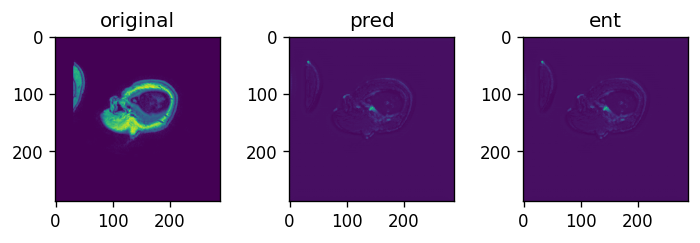

4 : 810 / 990 : BCE loss: 0.06432989239692688
4 : 820 / 990 : BCE loss: 0.25846314430236816
4 : 830 / 990 : BCE loss: 0.16011616587638855
4 : 840 / 990 : BCE loss: 0.30352160334587097
4 : 850 / 990 : BCE loss: 0.18159577250480652
4 : 860 / 990 : BCE loss: 0.16363778710365295
4 : 870 / 990 : BCE loss: 0.2898191213607788
4 : 880 / 990 : BCE loss: 0.3219800293445587
4 : 890 / 990 : BCE loss: 0.2626180350780487
4 : 900 / 990 : BCE loss: 0.14203014969825745
4 : 910 / 990 : BCE loss: 0.38429272174835205
4 : 920 / 990 : BCE loss: 0.3262118697166443
4 : 930 / 990 : BCE loss: 0.17695252597332
4 : 940 / 990 : BCE loss: 0.3390435576438904
4 : 950 / 990 : BCE loss: 0.6293514966964722
4 : 960 / 990 : BCE loss: 0.2828161120414734
4 : 970 / 990 : BCE loss: 0.10206569731235504
4 : 980 / 990 : BCE loss: 0.32356223464012146
EPOCH ACC:  84.9747543334961

4 : 0 / 135 : VAL BCE loss: 0.6297773122787476


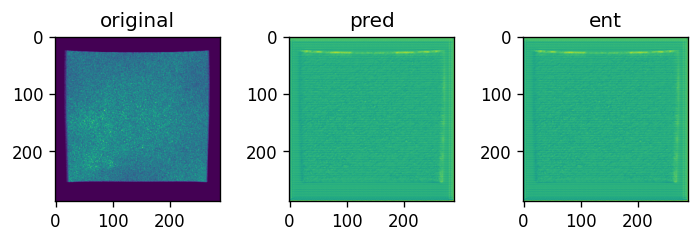

4 : 10 / 135 : VAL BCE loss: 0.16449904441833496
4 : 20 / 135 : VAL BCE loss: 0.00016891062841750681
4 : 30 / 135 : VAL BCE loss: 1.7955956082005287e-06
4 : 40 / 135 : VAL BCE loss: 2.5593275495339185e-05
4 : 50 / 135 : VAL BCE loss: 0.6296145915985107
4 : 60 / 135 : VAL BCE loss: 0.6297585964202881
4 : 70 / 135 : VAL BCE loss: 0.29016509652137756
4 : 80 / 135 : VAL BCE loss: 0.07955370843410492
4 : 90 / 135 : VAL BCE loss: 0.25791236758232117
4 : 100 / 135 : VAL BCE loss: 0.004468251019716263


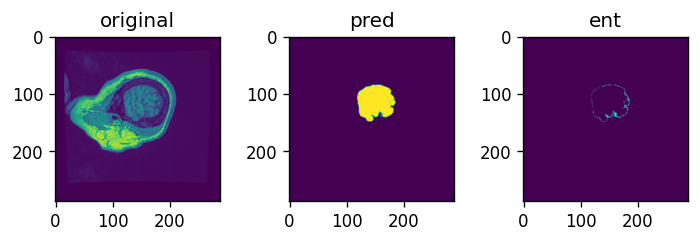

4 : 110 / 135 : VAL BCE loss: 0.6297779083251953
4 : 120 / 135 : VAL BCE loss: 0.4778880774974823
4 : 130 / 135 : VAL BCE loss: 0.3313627243041992
VAL EPOCH ACC:  95.49256896972656

4 : 0 / 124 : VAL BCE loss: 0.7608202695846558


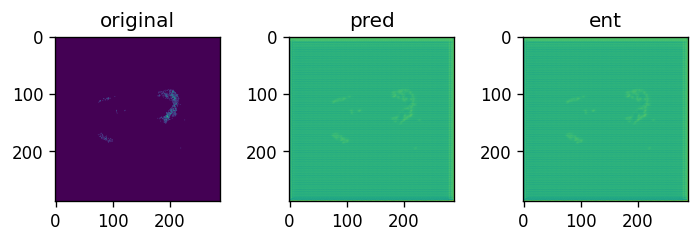

4 : 10 / 124 : VAL BCE loss: 0.722948431968689
4 : 20 / 124 : VAL BCE loss: 0.24256643652915955
4 : 30 / 124 : VAL BCE loss: 7.450584149637507e-08
4 : 40 / 124 : VAL BCE loss: 0.0007427359232679009
4 : 50 / 124 : VAL BCE loss: 8.229632840084378e-06
4 : 60 / 124 : VAL BCE loss: 2.99516977975145e-06
4 : 70 / 124 : VAL BCE loss: 0.06308307498693466
4 : 80 / 124 : VAL BCE loss: 0.4013655483722687
4 : 90 / 124 : VAL BCE loss: 0.7608057260513306
4 : 100 / 124 : VAL BCE loss: 0.7608083486557007


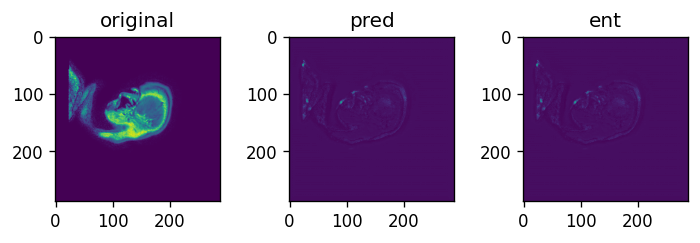

4 : 110 / 124 : VAL BCE loss: 0.0050431545823812485
4 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  69.29293060302734

EPOCH:  5
5 : 0 / 990 : BCE loss: 0.46537166833877563


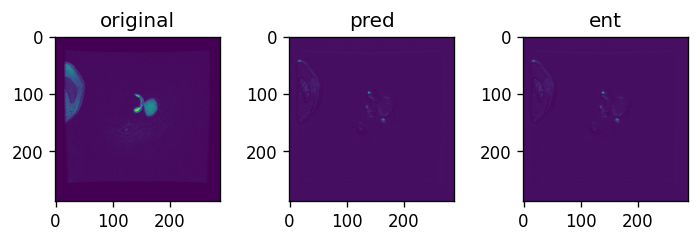

5 : 10 / 990 : BCE loss: 0.22595813870429993
5 : 20 / 990 : BCE loss: 0.32944393157958984
5 : 30 / 990 : BCE loss: 0.2777177691459656
5 : 40 / 990 : BCE loss: 0.2766033411026001
5 : 50 / 990 : BCE loss: 0.24394570291042328
5 : 60 / 990 : BCE loss: 0.17769700288772583
5 : 70 / 990 : BCE loss: 0.32889556884765625
5 : 80 / 990 : BCE loss: 0.24811942875385284
5 : 90 / 990 : BCE loss: 0.22995363175868988
5 : 100 / 990 : BCE loss: 0.11746853590011597
5 : 110 / 990 : BCE loss: 0.23876696825027466
5 : 120 / 990 : BCE loss: 0.23336303234100342
5 : 130 / 990 : BCE loss: 0.26450029015541077
5 : 140 / 990 : BCE loss: 0.09092804789543152
5 : 150 / 990 : BCE loss: 0.25296080112457275
5 : 160 / 990 : BCE loss: 0.0964224711060524
5 : 170 / 990 : BCE loss: 0.36113888025283813
5 : 180 / 990 : BCE loss: 0.3060833215713501
5 : 190 / 990 : BCE loss: 0.10659637302160263
5 : 200 / 990 : BCE loss: 0.29890385270118713


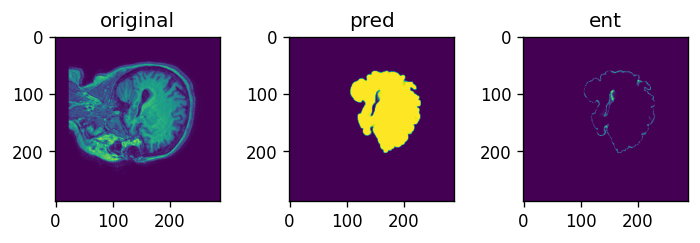

5 : 210 / 990 : BCE loss: 0.27967286109924316
5 : 220 / 990 : BCE loss: 0.19666075706481934
5 : 230 / 990 : BCE loss: 0.1963249146938324
5 : 240 / 990 : BCE loss: 0.1855570375919342
5 : 250 / 990 : BCE loss: 0.25384968519210815
5 : 260 / 990 : BCE loss: 0.2228788435459137
5 : 270 / 990 : BCE loss: 0.19769173860549927
5 : 280 / 990 : BCE loss: 0.29634183645248413
5 : 290 / 990 : BCE loss: 0.173985093832016
5 : 300 / 990 : BCE loss: 0.204762265086174
5 : 310 / 990 : BCE loss: 0.3281586766242981
5 : 320 / 990 : BCE loss: 0.18651992082595825
5 : 330 / 990 : BCE loss: 0.19738279283046722
5 : 340 / 990 : BCE loss: 0.20075148344039917
5 : 350 / 990 : BCE loss: 0.16130374372005463
5 : 360 / 990 : BCE loss: 0.36967241764068604
5 : 370 / 990 : BCE loss: 0.18790815770626068
5 : 380 / 990 : BCE loss: 0.28418558835983276
5 : 390 / 990 : BCE loss: 0.06450188905000687
5 : 400 / 990 : BCE loss: 0.1715898960828781


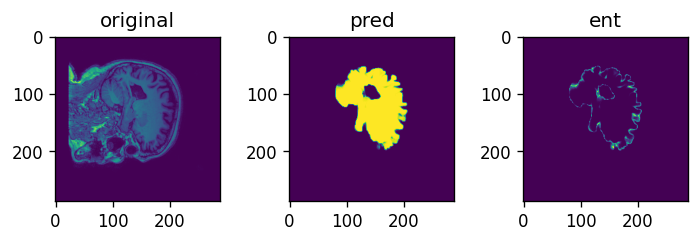

5 : 410 / 990 : BCE loss: 0.21464332938194275
5 : 420 / 990 : BCE loss: 0.37524425983428955
5 : 430 / 990 : BCE loss: 0.26201897859573364
5 : 440 / 990 : BCE loss: 0.1268225461244583
5 : 450 / 990 : BCE loss: 0.23100054264068604
5 : 460 / 990 : BCE loss: 0.04182875528931618
5 : 470 / 990 : BCE loss: 0.2768841087818146
5 : 480 / 990 : BCE loss: 0.2971286475658417
5 : 490 / 990 : BCE loss: 0.4241543114185333
5 : 500 / 990 : BCE loss: 0.4304641783237457
5 : 510 / 990 : BCE loss: 0.1114642471075058
5 : 520 / 990 : BCE loss: 0.19037452340126038
5 : 530 / 990 : BCE loss: 0.12656356394290924
5 : 540 / 990 : BCE loss: 0.24785415828227997
5 : 550 / 990 : BCE loss: 0.2853257656097412
5 : 560 / 990 : BCE loss: 0.36393123865127563
5 : 570 / 990 : BCE loss: 0.1467285007238388
5 : 580 / 990 : BCE loss: 0.3003063499927521
5 : 590 / 990 : BCE loss: 0.3767048418521881
5 : 600 / 990 : BCE loss: 0.2289809137582779


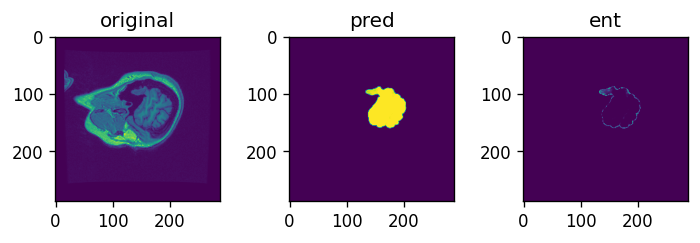

5 : 610 / 990 : BCE loss: 0.35622814297676086
5 : 620 / 990 : BCE loss: 0.1626003533601761
5 : 630 / 990 : BCE loss: 0.3646184206008911
5 : 640 / 990 : BCE loss: 0.19498203694820404
5 : 650 / 990 : BCE loss: 0.14037856459617615
5 : 660 / 990 : BCE loss: 0.12252150475978851
5 : 670 / 990 : BCE loss: 0.35905545949935913
5 : 680 / 990 : BCE loss: 0.32348644733428955
5 : 690 / 990 : BCE loss: 0.23039674758911133
5 : 700 / 990 : BCE loss: 0.3382284641265869
5 : 710 / 990 : BCE loss: 0.31400126218795776
5 : 720 / 990 : BCE loss: 0.3604825735092163
5 : 730 / 990 : BCE loss: 0.08814771473407745
5 : 740 / 990 : BCE loss: 0.20276272296905518
5 : 750 / 990 : BCE loss: 0.26394838094711304
5 : 760 / 990 : BCE loss: 0.3812409043312073
5 : 770 / 990 : BCE loss: 0.19891279935836792
5 : 780 / 990 : BCE loss: 0.05028866231441498
5 : 790 / 990 : BCE loss: 0.2980308532714844
5 : 800 / 990 : BCE loss: 0.3926548957824707


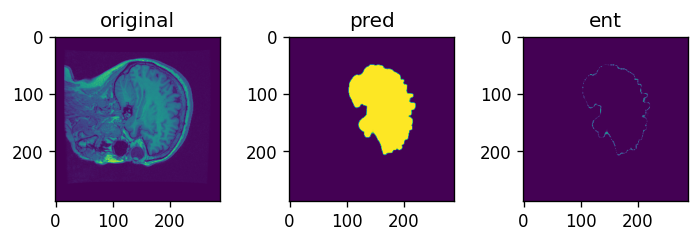

5 : 810 / 990 : BCE loss: 0.30334776639938354
5 : 820 / 990 : BCE loss: 0.5852138996124268
5 : 830 / 990 : BCE loss: 0.16117915511131287
5 : 840 / 990 : BCE loss: 0.04766619950532913
5 : 850 / 990 : BCE loss: 0.1847585290670395
5 : 860 / 990 : BCE loss: 0.28634896874427795
5 : 870 / 990 : BCE loss: 0.2299170345067978
5 : 880 / 990 : BCE loss: 0.2292088270187378
5 : 890 / 990 : BCE loss: 0.17452074587345123
5 : 900 / 990 : BCE loss: 0.15561166405677795
5 : 910 / 990 : BCE loss: 0.29425233602523804
5 : 920 / 990 : BCE loss: 0.3353840112686157
5 : 930 / 990 : BCE loss: 0.21626096963882446
5 : 940 / 990 : BCE loss: 0.23282748460769653
5 : 950 / 990 : BCE loss: 0.2864159345626831
5 : 960 / 990 : BCE loss: 0.1996772587299347
5 : 970 / 990 : BCE loss: 0.35581886768341064
5 : 980 / 990 : BCE loss: 0.34781426191329956
EPOCH ACC:  85.44823455810547

5 : 0 / 135 : VAL BCE loss: 0.649492084980011


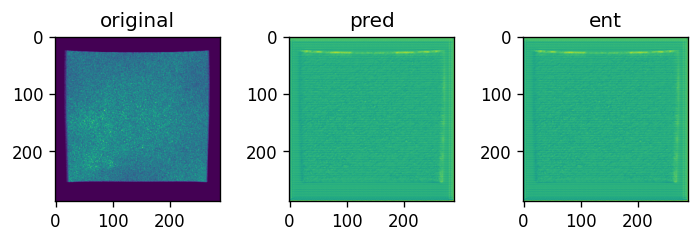

5 : 10 / 135 : VAL BCE loss: 0.24090248346328735
5 : 20 / 135 : VAL BCE loss: 0.00015487989003304392
5 : 30 / 135 : VAL BCE loss: 8.940698137394065e-08
5 : 40 / 135 : VAL BCE loss: 6.128720269771293e-05
5 : 50 / 135 : VAL BCE loss: 0.6493774056434631
5 : 60 / 135 : VAL BCE loss: 0.6494865417480469
5 : 70 / 135 : VAL BCE loss: 0.5821009874343872
5 : 80 / 135 : VAL BCE loss: 0.1490279883146286
5 : 90 / 135 : VAL BCE loss: 0.5640863180160522
5 : 100 / 135 : VAL BCE loss: 0.004904501140117645


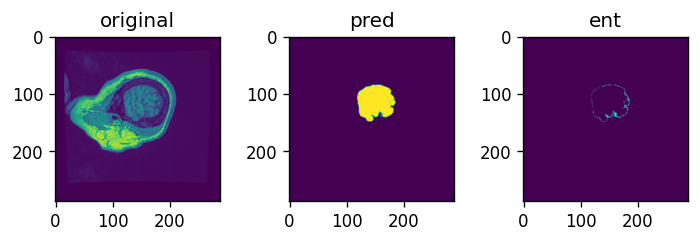

5 : 110 / 135 : VAL BCE loss: 0.6495059132575989
5 : 120 / 135 : VAL BCE loss: 0.5578711032867432
5 : 130 / 135 : VAL BCE loss: 0.735442042350769
VAL EPOCH ACC:  93.16914367675781

5 : 0 / 124 : VAL BCE loss: 0.7388008832931519


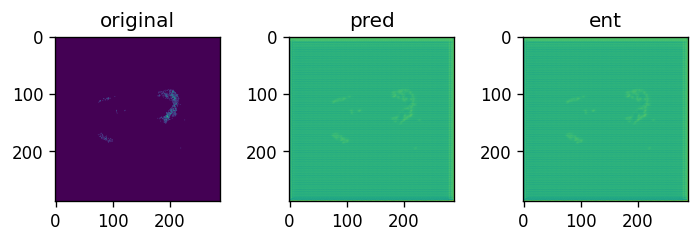

5 : 10 / 124 : VAL BCE loss: 0.624068021774292
5 : 20 / 124 : VAL BCE loss: 0.11531821638345718
5 : 30 / 124 : VAL BCE loss: 7.450580596923828e-09
5 : 40 / 124 : VAL BCE loss: 0.00044520210940390825
5 : 50 / 124 : VAL BCE loss: 8.381941825064132e-07
5 : 60 / 124 : VAL BCE loss: 1.750887719254024e-07
5 : 70 / 124 : VAL BCE loss: 0.27653777599334717
5 : 80 / 124 : VAL BCE loss: 0.3202534317970276
5 : 90 / 124 : VAL BCE loss: 0.7387892007827759
5 : 100 / 124 : VAL BCE loss: 0.7387845516204834


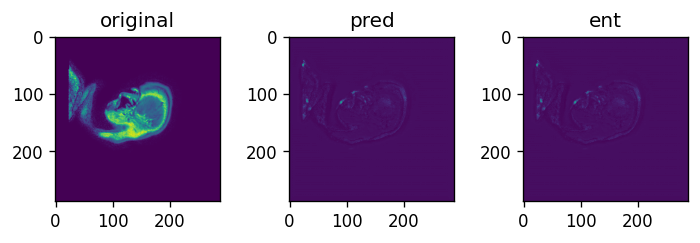

5 : 110 / 124 : VAL BCE loss: 0.0013406872749328613
5 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  70.9595947265625

EPOCH:  6
6 : 0 / 990 : BCE loss: 0.28483256697654724


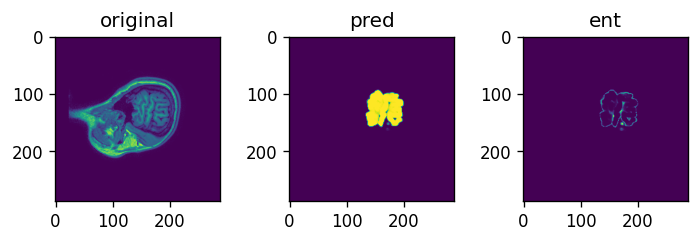

6 : 10 / 990 : BCE loss: 0.17258697748184204
6 : 20 / 990 : BCE loss: 0.2692118287086487
6 : 30 / 990 : BCE loss: 0.1533869504928589
6 : 40 / 990 : BCE loss: 0.32964733242988586
6 : 50 / 990 : BCE loss: 0.27064502239227295
6 : 60 / 990 : BCE loss: 0.21733544766902924
6 : 70 / 990 : BCE loss: 0.21764785051345825
6 : 80 / 990 : BCE loss: 0.19904214143753052
6 : 90 / 990 : BCE loss: 0.09505901485681534
6 : 100 / 990 : BCE loss: 0.25070512294769287
6 : 110 / 990 : BCE loss: 0.22158323228359222
6 : 120 / 990 : BCE loss: 0.06417202204465866
6 : 130 / 990 : BCE loss: 0.19566233456134796
6 : 140 / 990 : BCE loss: 0.01811741478741169
6 : 150 / 990 : BCE loss: 0.06895589083433151
6 : 160 / 990 : BCE loss: 0.13885599374771118
6 : 170 / 990 : BCE loss: 0.18479718267917633
6 : 180 / 990 : BCE loss: 0.4132319688796997
6 : 190 / 990 : BCE loss: 0.36940738558769226
6 : 200 / 990 : BCE loss: 0.14874254167079926


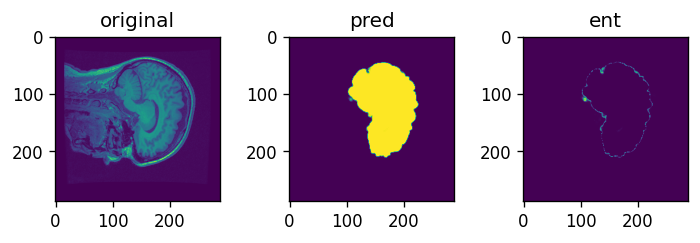

6 : 210 / 990 : BCE loss: 0.23844146728515625
6 : 220 / 990 : BCE loss: 0.197060689330101
6 : 230 / 990 : BCE loss: 0.37363141775131226
6 : 240 / 990 : BCE loss: 0.24011817574501038
6 : 250 / 990 : BCE loss: 0.17309235036373138
6 : 260 / 990 : BCE loss: 0.2325536608695984
6 : 270 / 990 : BCE loss: 0.45977434515953064
6 : 280 / 990 : BCE loss: 0.2773524224758148
6 : 290 / 990 : BCE loss: 0.21186964213848114
6 : 300 / 990 : BCE loss: 0.14290978014469147
6 : 310 / 990 : BCE loss: 0.1999417543411255
6 : 320 / 990 : BCE loss: 0.3005329668521881
6 : 330 / 990 : BCE loss: 0.2117985337972641
6 : 340 / 990 : BCE loss: 0.08928819745779037
6 : 350 / 990 : BCE loss: 0.30377355217933655
6 : 360 / 990 : BCE loss: 0.2574715316295624
6 : 370 / 990 : BCE loss: 0.15578483045101166
6 : 380 / 990 : BCE loss: 0.31373924016952515
6 : 390 / 990 : BCE loss: 0.4057786166667938
6 : 400 / 990 : BCE loss: 0.1623416244983673


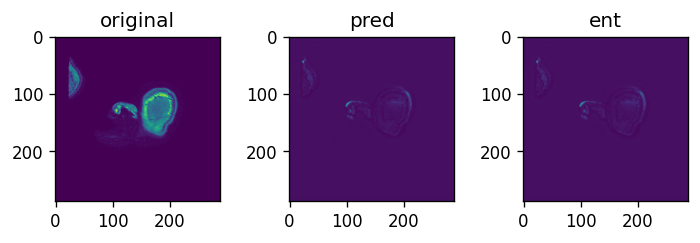

6 : 410 / 990 : BCE loss: 0.1553988754749298
6 : 420 / 990 : BCE loss: 0.3568097949028015
6 : 430 / 990 : BCE loss: 0.20464369654655457
6 : 440 / 990 : BCE loss: 0.28682559728622437
6 : 450 / 990 : BCE loss: 0.1797066330909729
6 : 460 / 990 : BCE loss: 0.1750929355621338
6 : 470 / 990 : BCE loss: 0.3016139268875122
6 : 480 / 990 : BCE loss: 0.24351012706756592
6 : 490 / 990 : BCE loss: 0.1288047432899475
6 : 500 / 990 : BCE loss: 0.27074894309043884
6 : 510 / 990 : BCE loss: 0.3815591335296631
6 : 520 / 990 : BCE loss: 0.2179587036371231
6 : 530 / 990 : BCE loss: 0.5412788391113281
6 : 540 / 990 : BCE loss: 0.2618689239025116
6 : 550 / 990 : BCE loss: 0.1569700837135315
6 : 560 / 990 : BCE loss: 0.21279484033584595
6 : 570 / 990 : BCE loss: 0.45462286472320557
6 : 580 / 990 : BCE loss: 0.20699673891067505
6 : 590 / 990 : BCE loss: 0.16354167461395264
6 : 600 / 990 : BCE loss: 0.3007410764694214


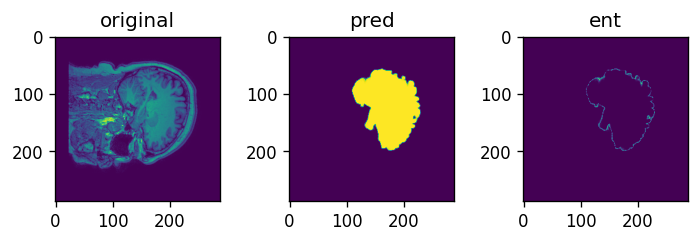

6 : 610 / 990 : BCE loss: 0.12575043737888336
6 : 620 / 990 : BCE loss: 0.42468395829200745
6 : 630 / 990 : BCE loss: 0.3451414108276367
6 : 640 / 990 : BCE loss: 0.04309700056910515
6 : 650 / 990 : BCE loss: 0.1810598522424698
6 : 660 / 990 : BCE loss: 0.27061837911605835
6 : 670 / 990 : BCE loss: 0.2219529151916504
6 : 680 / 990 : BCE loss: 0.1687006950378418
6 : 690 / 990 : BCE loss: 0.12387493252754211
6 : 700 / 990 : BCE loss: 0.18399839103221893
6 : 710 / 990 : BCE loss: 0.2995898127555847
6 : 720 / 990 : BCE loss: 0.1867973655462265
6 : 730 / 990 : BCE loss: 0.21091124415397644
6 : 740 / 990 : BCE loss: 0.05533985048532486
6 : 750 / 990 : BCE loss: 0.38688716292381287
6 : 760 / 990 : BCE loss: 0.27389368414878845
6 : 770 / 990 : BCE loss: 0.31837254762649536
6 : 780 / 990 : BCE loss: 0.33820587396621704
6 : 790 / 990 : BCE loss: 0.30827999114990234
6 : 800 / 990 : BCE loss: 0.4899681806564331


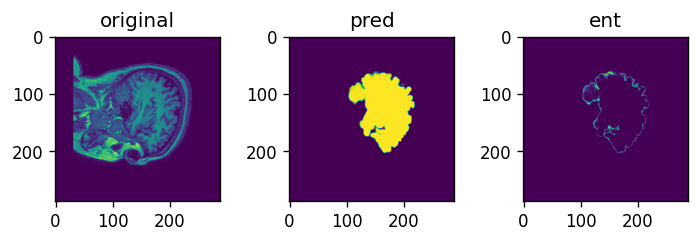

6 : 810 / 990 : BCE loss: 0.06967897713184357
6 : 820 / 990 : BCE loss: 0.24851134419441223
6 : 830 / 990 : BCE loss: 0.21251347661018372
6 : 840 / 990 : BCE loss: 0.22611697018146515
6 : 850 / 990 : BCE loss: 0.2715703845024109
6 : 860 / 990 : BCE loss: 0.17432120442390442
6 : 870 / 990 : BCE loss: 0.16124917566776276
6 : 880 / 990 : BCE loss: 0.5431592464447021
6 : 890 / 990 : BCE loss: 0.20306330919265747
6 : 900 / 990 : BCE loss: 0.4223448634147644
6 : 910 / 990 : BCE loss: 0.300323486328125
6 : 920 / 990 : BCE loss: 0.3817254900932312
6 : 930 / 990 : BCE loss: 0.2629435062408447
6 : 940 / 990 : BCE loss: 0.18353711068630219
6 : 950 / 990 : BCE loss: 0.33631986379623413
6 : 960 / 990 : BCE loss: 0.2795131206512451
6 : 970 / 990 : BCE loss: 0.233103409409523
6 : 980 / 990 : BCE loss: 0.35908159613609314
EPOCH ACC:  85.6439437866211

6 : 0 / 135 : VAL BCE loss: 0.557842493057251


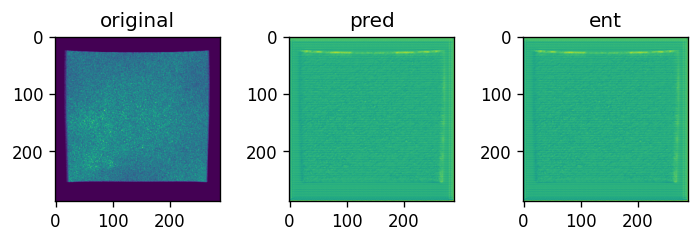

6 : 10 / 135 : VAL BCE loss: 0.25213170051574707
6 : 20 / 135 : VAL BCE loss: 0.000391323963413015
6 : 30 / 135 : VAL BCE loss: 3.5762803918260033e-07
6 : 40 / 135 : VAL BCE loss: 5.821044760523364e-05
6 : 50 / 135 : VAL BCE loss: 0.5577892065048218
6 : 60 / 135 : VAL BCE loss: 0.5578327178955078
6 : 70 / 135 : VAL BCE loss: 0.23219993710517883
6 : 80 / 135 : VAL BCE loss: 0.017937779426574707
6 : 90 / 135 : VAL BCE loss: 0.3286702632904053
6 : 100 / 135 : VAL BCE loss: 0.0028655643109232187


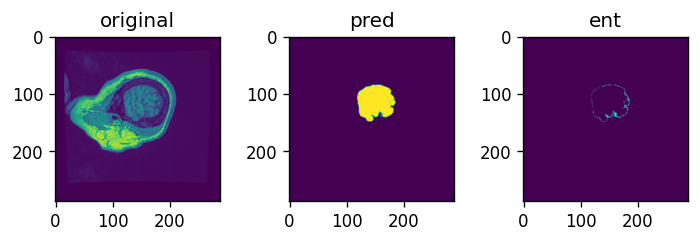

6 : 110 / 135 : VAL BCE loss: 0.5578421950340271
6 : 120 / 135 : VAL BCE loss: 0.3707370460033417
6 : 130 / 135 : VAL BCE loss: 0.2491217851638794
VAL EPOCH ACC:  96.23605346679688

6 : 0 / 124 : VAL BCE loss: 0.8496780395507812


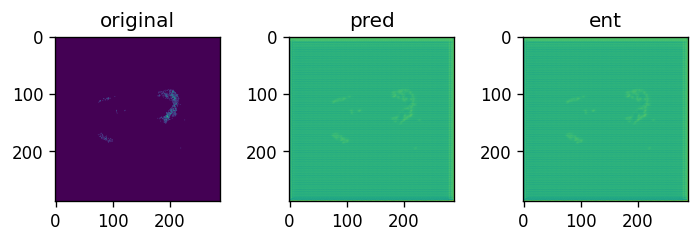

6 : 10 / 124 : VAL BCE loss: 0.7899911403656006
6 : 20 / 124 : VAL BCE loss: 0.12870526313781738
6 : 30 / 124 : VAL BCE loss: 0.0
6 : 40 / 124 : VAL BCE loss: 9.252024028683081e-05
6 : 50 / 124 : VAL BCE loss: 2.2724307768839935e-07
6 : 60 / 124 : VAL BCE loss: 1.1175871783564162e-08
6 : 70 / 124 : VAL BCE loss: 0.007100611925125122
6 : 80 / 124 : VAL BCE loss: 0.4625774323940277
6 : 90 / 124 : VAL BCE loss: 0.8496688604354858
6 : 100 / 124 : VAL BCE loss: 0.8496717810630798


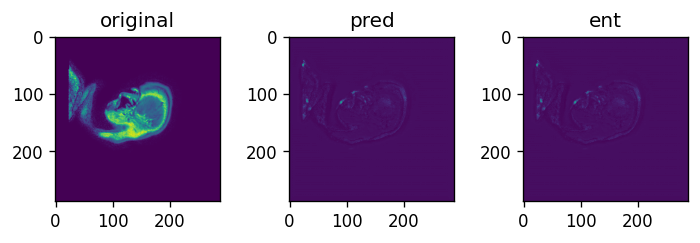

6 : 110 / 124 : VAL BCE loss: 0.002411260036751628
6 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  69.54545593261719

EPOCH:  7
7 : 0 / 990 : BCE loss: 0.1785700023174286


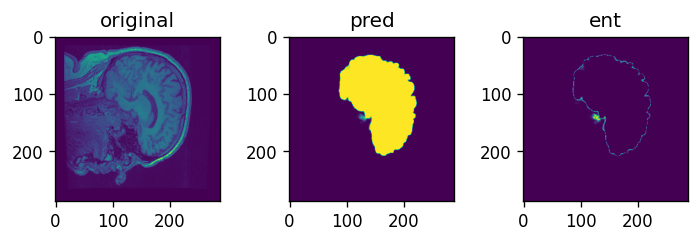

7 : 10 / 990 : BCE loss: 0.224411740899086
7 : 20 / 990 : BCE loss: 0.3319514989852905
7 : 30 / 990 : BCE loss: 0.1607462763786316
7 : 40 / 990 : BCE loss: 0.2662001848220825
7 : 50 / 990 : BCE loss: 0.12286199629306793
7 : 60 / 990 : BCE loss: 0.4230959117412567
7 : 70 / 990 : BCE loss: 0.3145354092121124
7 : 80 / 990 : BCE loss: 0.13520212471485138
7 : 90 / 990 : BCE loss: 0.33414027094841003
7 : 100 / 990 : BCE loss: 0.1863701343536377
7 : 110 / 990 : BCE loss: 0.056777406483888626
7 : 120 / 990 : BCE loss: 0.14593389630317688
7 : 130 / 990 : BCE loss: 0.1815463900566101
7 : 140 / 990 : BCE loss: 0.16364328563213348
7 : 150 / 990 : BCE loss: 0.2105027437210083
7 : 160 / 990 : BCE loss: 0.08487045764923096
7 : 170 / 990 : BCE loss: 0.2148873656988144
7 : 180 / 990 : BCE loss: 0.11891227215528488
7 : 190 / 990 : BCE loss: 0.5548846125602722
7 : 200 / 990 : BCE loss: 0.3087224066257477


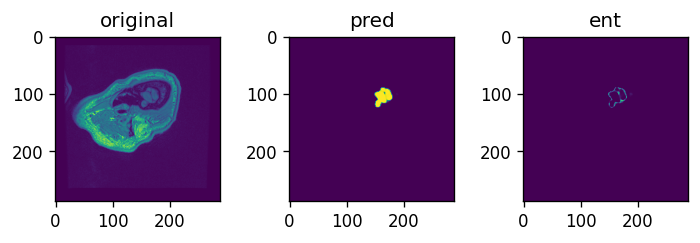

7 : 210 / 990 : BCE loss: 0.29801756143569946
7 : 220 / 990 : BCE loss: 0.28895246982574463
7 : 230 / 990 : BCE loss: 0.23167479038238525
7 : 240 / 990 : BCE loss: 0.3735180199146271
7 : 250 / 990 : BCE loss: 0.18164873123168945
7 : 260 / 990 : BCE loss: 0.1620836853981018
7 : 270 / 990 : BCE loss: 0.2272694706916809
7 : 280 / 990 : BCE loss: 0.3552176058292389
7 : 290 / 990 : BCE loss: 0.14289313554763794
7 : 300 / 990 : BCE loss: 0.107350192964077
7 : 310 / 990 : BCE loss: 0.3561316132545471
7 : 320 / 990 : BCE loss: 0.3005182147026062
7 : 330 / 990 : BCE loss: 0.32350653409957886
7 : 340 / 990 : BCE loss: 0.20603802800178528
7 : 350 / 990 : BCE loss: 0.5440789461135864
7 : 360 / 990 : BCE loss: 0.27860188484191895
7 : 370 / 990 : BCE loss: 0.2630375027656555
7 : 380 / 990 : BCE loss: 0.3150005638599396
7 : 390 / 990 : BCE loss: 0.07825760543346405
7 : 400 / 990 : BCE loss: 0.08221960067749023


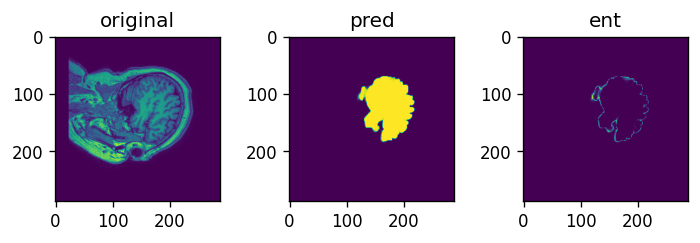

7 : 410 / 990 : BCE loss: 0.3617800772190094
7 : 420 / 990 : BCE loss: 0.31233102083206177
7 : 430 / 990 : BCE loss: 0.2752242386341095
7 : 440 / 990 : BCE loss: 0.19734598696231842
7 : 450 / 990 : BCE loss: 0.23172509670257568
7 : 460 / 990 : BCE loss: 0.38137179613113403
7 : 470 / 990 : BCE loss: 0.2832677364349365
7 : 480 / 990 : BCE loss: 0.21057634055614471
7 : 490 / 990 : BCE loss: 0.3411829471588135
7 : 500 / 990 : BCE loss: 0.2788161635398865
7 : 510 / 990 : BCE loss: 0.16475513577461243
7 : 520 / 990 : BCE loss: 0.1153002604842186
7 : 530 / 990 : BCE loss: 0.2533472180366516
7 : 540 / 990 : BCE loss: 0.23234140872955322
7 : 550 / 990 : BCE loss: 0.20802046358585358
7 : 560 / 990 : BCE loss: 0.15997803211212158
7 : 570 / 990 : BCE loss: 0.1900351196527481
7 : 580 / 990 : BCE loss: 0.20170092582702637
7 : 590 / 990 : BCE loss: 0.2588310241699219
7 : 600 / 990 : BCE loss: 0.13363268971443176


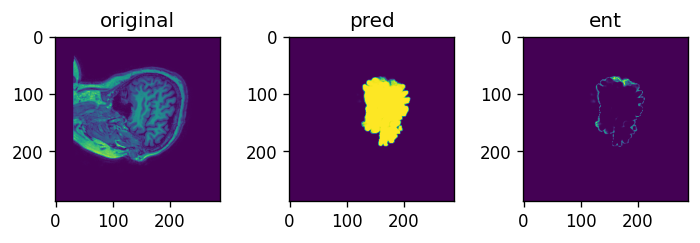

7 : 610 / 990 : BCE loss: 0.123528391122818
7 : 620 / 990 : BCE loss: 0.2503315508365631
7 : 630 / 990 : BCE loss: 0.25653135776519775
7 : 640 / 990 : BCE loss: 0.35035544633865356
7 : 650 / 990 : BCE loss: 0.3128451704978943
7 : 660 / 990 : BCE loss: 0.2546183466911316
7 : 670 / 990 : BCE loss: 0.1968536674976349
7 : 680 / 990 : BCE loss: 0.2025185227394104
7 : 690 / 990 : BCE loss: 0.1924954354763031
7 : 700 / 990 : BCE loss: 0.0023440509103238583
7 : 710 / 990 : BCE loss: 0.28176504373550415
7 : 720 / 990 : BCE loss: 0.2277836948633194
7 : 730 / 990 : BCE loss: 0.4508678615093231
7 : 740 / 990 : BCE loss: 0.2168438732624054
7 : 750 / 990 : BCE loss: 0.17178770899772644
7 : 760 / 990 : BCE loss: 0.16295674443244934
7 : 770 / 990 : BCE loss: 0.24902735650539398
7 : 780 / 990 : BCE loss: 0.32423198223114014
7 : 790 / 990 : BCE loss: 0.3457423746585846
7 : 800 / 990 : BCE loss: 0.2066386342048645


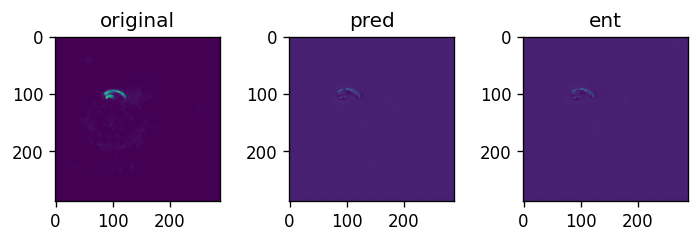

7 : 810 / 990 : BCE loss: 0.47728174924850464
7 : 820 / 990 : BCE loss: 0.43850624561309814
7 : 830 / 990 : BCE loss: 0.17288702726364136
7 : 840 / 990 : BCE loss: 0.39122748374938965
7 : 850 / 990 : BCE loss: 0.19873705506324768
7 : 860 / 990 : BCE loss: 0.28965598344802856
7 : 870 / 990 : BCE loss: 0.15476924180984497
7 : 880 / 990 : BCE loss: 0.25347715616226196
7 : 890 / 990 : BCE loss: 0.21015149354934692
7 : 900 / 990 : BCE loss: 0.15336816012859344
7 : 910 / 990 : BCE loss: 0.2865062355995178
7 : 920 / 990 : BCE loss: 0.12284814566373825
7 : 930 / 990 : BCE loss: 0.1540645956993103
7 : 940 / 990 : BCE loss: 0.19726257026195526
7 : 950 / 990 : BCE loss: 0.19082686305046082
7 : 960 / 990 : BCE loss: 0.18399205803871155
7 : 970 / 990 : BCE loss: 0.14832454919815063
7 : 980 / 990 : BCE loss: 0.21956032514572144
EPOCH ACC:  85.8270263671875

7 : 0 / 135 : VAL BCE loss: 0.5307449102401733


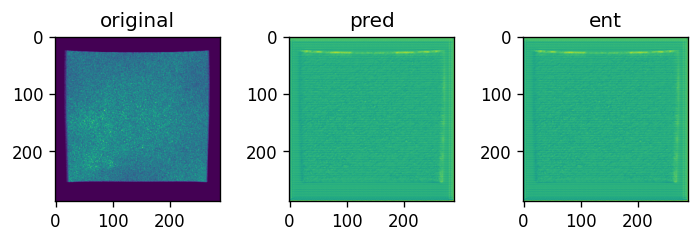

7 : 10 / 135 : VAL BCE loss: 0.1146949902176857
7 : 20 / 135 : VAL BCE loss: 0.005260585807263851
7 : 30 / 135 : VAL BCE loss: 4.8801898628880735e-06
7 : 40 / 135 : VAL BCE loss: 0.00031546567333862185
7 : 50 / 135 : VAL BCE loss: 0.5307443141937256
7 : 60 / 135 : VAL BCE loss: 0.5307447910308838
7 : 70 / 135 : VAL BCE loss: 0.23845186829566956
7 : 80 / 135 : VAL BCE loss: 0.04563771188259125
7 : 90 / 135 : VAL BCE loss: 2.703571319580078
7 : 100 / 135 : VAL BCE loss: 0.0030274363234639168


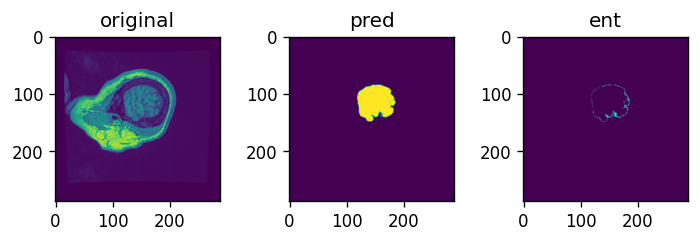

7 : 110 / 135 : VAL BCE loss: 0.5307449102401733
7 : 120 / 135 : VAL BCE loss: 0.41282594203948975
7 : 130 / 135 : VAL BCE loss: 1.2511907815933228
VAL EPOCH ACC:  92.10037231445312

7 : 0 / 124 : VAL BCE loss: 0.8871362805366516


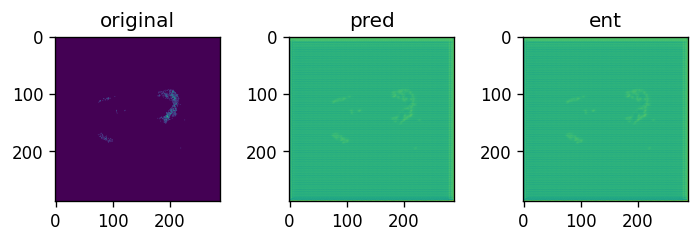

7 : 10 / 124 : VAL BCE loss: 0.7821832895278931
7 : 20 / 124 : VAL BCE loss: 0.23125849664211273
7 : 30 / 124 : VAL BCE loss: 0.0
7 : 40 / 124 : VAL BCE loss: 0.0008217263966798782
7 : 50 / 124 : VAL BCE loss: 2.831224605870375e-07
7 : 60 / 124 : VAL BCE loss: 1.0430818520035245e-07
7 : 70 / 124 : VAL BCE loss: 0.1293979287147522
7 : 80 / 124 : VAL BCE loss: 0.37276288866996765
7 : 90 / 124 : VAL BCE loss: 0.8871362209320068
7 : 100 / 124 : VAL BCE loss: 0.8871361613273621


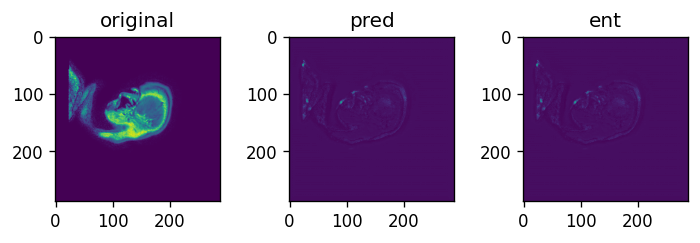

7 : 110 / 124 : VAL BCE loss: 0.0020614962559193373
7 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  69.74747467041016

EPOCH:  8
8 : 0 / 990 : BCE loss: 0.21706078946590424


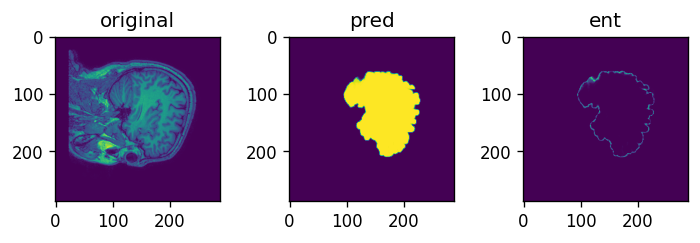

8 : 10 / 990 : BCE loss: 0.16752344369888306
8 : 20 / 990 : BCE loss: 0.16244131326675415
8 : 30 / 990 : BCE loss: 0.23268036544322968
8 : 40 / 990 : BCE loss: 0.3201402425765991
8 : 50 / 990 : BCE loss: 0.2647234797477722
8 : 60 / 990 : BCE loss: 0.055564120411872864
8 : 70 / 990 : BCE loss: 0.2998007833957672
8 : 80 / 990 : BCE loss: 0.22551044821739197
8 : 90 / 990 : BCE loss: 0.37759268283843994
8 : 100 / 990 : BCE loss: 0.3175555467605591
8 : 110 / 990 : BCE loss: 0.17084789276123047
8 : 120 / 990 : BCE loss: 0.29323577880859375
8 : 130 / 990 : BCE loss: 0.12865711748600006
8 : 140 / 990 : BCE loss: 0.0410149060189724
8 : 150 / 990 : BCE loss: 0.15584784746170044
8 : 160 / 990 : BCE loss: 0.2078832983970642
8 : 170 / 990 : BCE loss: 0.3094065189361572
8 : 180 / 990 : BCE loss: 0.16390281915664673
8 : 190 / 990 : BCE loss: 0.27024438977241516
8 : 200 / 990 : BCE loss: 0.12258505821228027


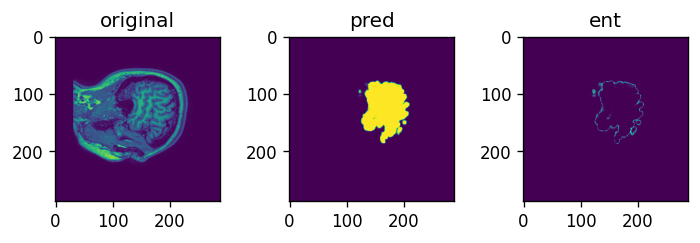

8 : 210 / 990 : BCE loss: 0.17666815221309662
8 : 220 / 990 : BCE loss: 0.17411258816719055
8 : 230 / 990 : BCE loss: 0.37557023763656616
8 : 240 / 990 : BCE loss: 0.10556010901927948
8 : 250 / 990 : BCE loss: 0.2972049117088318
8 : 260 / 990 : BCE loss: 0.16626733541488647
8 : 270 / 990 : BCE loss: 0.18222813308238983
8 : 280 / 990 : BCE loss: 0.3265584111213684
8 : 290 / 990 : BCE loss: 0.26649653911590576
8 : 300 / 990 : BCE loss: 0.4006590247154236
8 : 310 / 990 : BCE loss: 0.06026739254593849
8 : 320 / 990 : BCE loss: 0.15758398175239563
8 : 330 / 990 : BCE loss: 0.318666011095047
8 : 340 / 990 : BCE loss: 0.24031534790992737
8 : 350 / 990 : BCE loss: 0.08931918442249298
8 : 360 / 990 : BCE loss: 0.25070685148239136
8 : 370 / 990 : BCE loss: 0.2749112546443939
8 : 380 / 990 : BCE loss: 0.15075920522212982
8 : 390 / 990 : BCE loss: 0.24988743662834167
8 : 400 / 990 : BCE loss: 0.22850030660629272


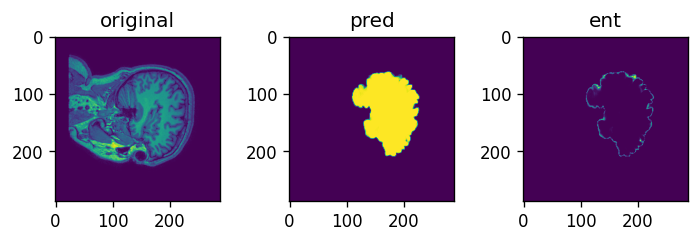

8 : 410 / 990 : BCE loss: 0.2775028347969055
8 : 420 / 990 : BCE loss: 0.31129491329193115
8 : 430 / 990 : BCE loss: 0.26108425855636597
8 : 440 / 990 : BCE loss: 0.3303477168083191
8 : 450 / 990 : BCE loss: 0.1740509569644928
8 : 460 / 990 : BCE loss: 0.2649039924144745
8 : 470 / 990 : BCE loss: 0.24829569458961487
8 : 480 / 990 : BCE loss: 0.17202982306480408
8 : 490 / 990 : BCE loss: 0.22548304498195648
8 : 500 / 990 : BCE loss: 0.2993634045124054
8 : 510 / 990 : BCE loss: 0.20850974321365356
8 : 520 / 990 : BCE loss: 0.24721458554267883
8 : 530 / 990 : BCE loss: 0.17800134420394897
8 : 540 / 990 : BCE loss: 0.1263105869293213
8 : 550 / 990 : BCE loss: 0.17305347323417664
8 : 560 / 990 : BCE loss: 0.2948266267776489
8 : 570 / 990 : BCE loss: 0.17890699207782745
8 : 580 / 990 : BCE loss: 0.1485798954963684
8 : 590 / 990 : BCE loss: 0.3122429847717285
8 : 600 / 990 : BCE loss: 0.29391124844551086


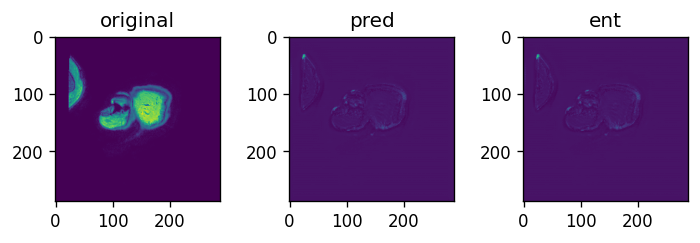

8 : 610 / 990 : BCE loss: 0.2513425350189209
8 : 620 / 990 : BCE loss: 0.18727169930934906
8 : 630 / 990 : BCE loss: 0.18641602993011475
8 : 640 / 990 : BCE loss: 0.20630936324596405
8 : 650 / 990 : BCE loss: 0.15726713836193085
8 : 660 / 990 : BCE loss: 0.20340865850448608
8 : 670 / 990 : BCE loss: 0.3912423253059387
8 : 680 / 990 : BCE loss: 0.24819490313529968
8 : 690 / 990 : BCE loss: 0.4188463091850281
8 : 700 / 990 : BCE loss: 0.5159911513328552
8 : 710 / 990 : BCE loss: 0.35243767499923706
8 : 720 / 990 : BCE loss: 0.21084073185920715
8 : 730 / 990 : BCE loss: 0.1611703634262085
8 : 740 / 990 : BCE loss: 0.1285664141178131
8 : 750 / 990 : BCE loss: 0.13270023465156555
8 : 760 / 990 : BCE loss: 0.26652294397354126
8 : 770 / 990 : BCE loss: 0.09063242375850677
8 : 780 / 990 : BCE loss: 0.27066847681999207
8 : 790 / 990 : BCE loss: 0.0951739251613617
8 : 800 / 990 : BCE loss: 0.15011915564537048


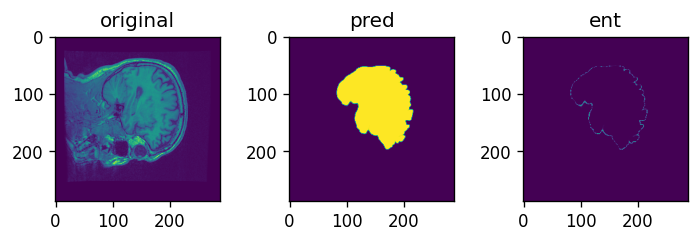

8 : 810 / 990 : BCE loss: 0.18573637306690216
8 : 820 / 990 : BCE loss: 0.34650546312332153
8 : 830 / 990 : BCE loss: 0.26048004627227783
8 : 840 / 990 : BCE loss: 0.26399096846580505
8 : 850 / 990 : BCE loss: 0.23953455686569214
8 : 860 / 990 : BCE loss: 0.210347980260849
8 : 870 / 990 : BCE loss: 0.31580203771591187
8 : 880 / 990 : BCE loss: 0.09702534973621368
8 : 890 / 990 : BCE loss: 0.1431540697813034
8 : 900 / 990 : BCE loss: 0.17589324712753296
8 : 910 / 990 : BCE loss: 0.13775217533111572
8 : 920 / 990 : BCE loss: 0.06071801111102104
8 : 930 / 990 : BCE loss: 0.17962604761123657
8 : 940 / 990 : BCE loss: 0.20941977202892303
8 : 950 / 990 : BCE loss: 0.2782076299190521
8 : 960 / 990 : BCE loss: 0.3022165298461914
8 : 970 / 990 : BCE loss: 0.27216142416000366
8 : 980 / 990 : BCE loss: 0.14592823386192322
EPOCH ACC:  85.87753295898438

8 : 0 / 135 : VAL BCE loss: 0.5330817103385925


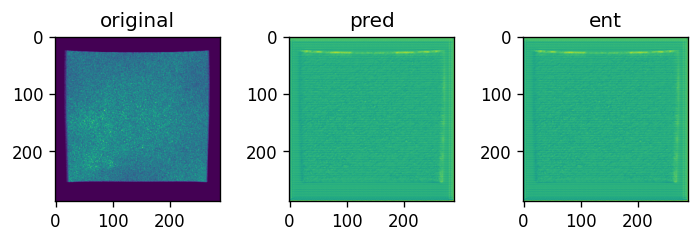

8 : 10 / 135 : VAL BCE loss: 1.6241850852966309
8 : 20 / 135 : VAL BCE loss: 2.8976337489439175e-05
8 : 30 / 135 : VAL BCE loss: 7.450581485102248e-09
8 : 40 / 135 : VAL BCE loss: 2.025571302510798e-05
8 : 50 / 135 : VAL BCE loss: 0.5330789089202881
8 : 60 / 135 : VAL BCE loss: 0.5330814719200134
8 : 70 / 135 : VAL BCE loss: 0.47867903113365173
8 : 80 / 135 : VAL BCE loss: 0.2593463659286499
8 : 90 / 135 : VAL BCE loss: 4.702915668487549
8 : 100 / 135 : VAL BCE loss: 0.0048146843910217285


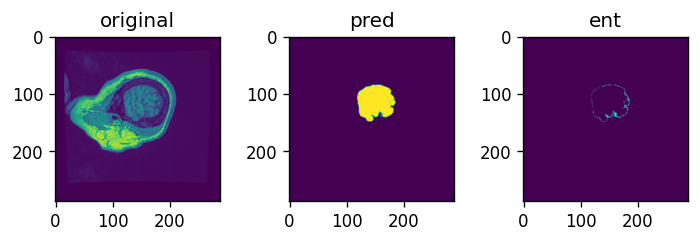

8 : 110 / 135 : VAL BCE loss: 0.5330817103385925
8 : 120 / 135 : VAL BCE loss: 0.8117679357528687
8 : 130 / 135 : VAL BCE loss: 3.3757565021514893
VAL EPOCH ACC:  87.918212890625

8 : 0 / 124 : VAL BCE loss: 0.8838093876838684


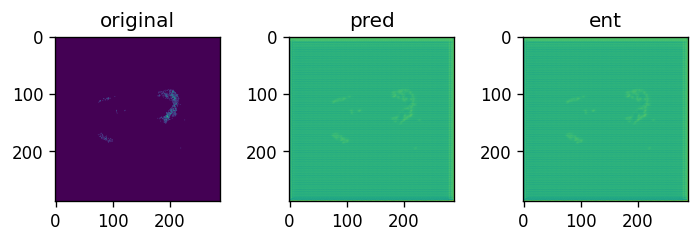

8 : 10 / 124 : VAL BCE loss: 0.7567508816719055
8 : 20 / 124 : VAL BCE loss: 0.0010823272168636322
8 : 30 / 124 : VAL BCE loss: 0.0
8 : 40 / 124 : VAL BCE loss: 1.862645326866641e-08
8 : 50 / 124 : VAL BCE loss: 0.0
8 : 60 / 124 : VAL BCE loss: 0.0
8 : 70 / 124 : VAL BCE loss: 0.01739940047264099
8 : 80 / 124 : VAL BCE loss: 0.31048184633255005
8 : 90 / 124 : VAL BCE loss: 0.8838093280792236
8 : 100 / 124 : VAL BCE loss: 0.8838096261024475


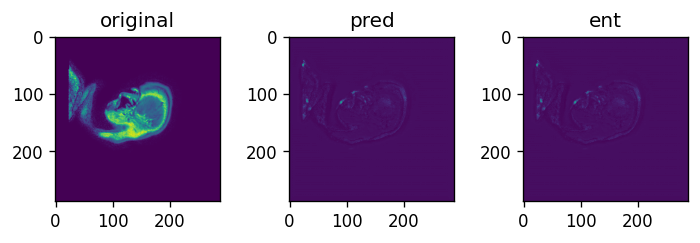

8 : 110 / 124 : VAL BCE loss: 0.00023197081463877112
8 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  73.63636779785156

EPOCH:  9
9 : 0 / 990 : BCE loss: 0.31207290291786194


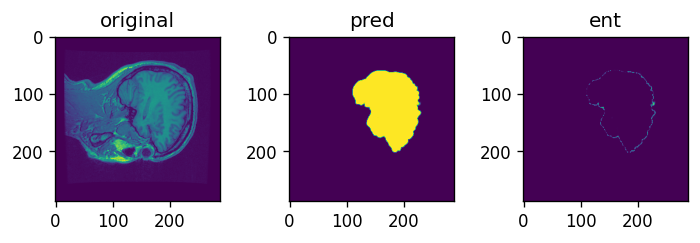

9 : 10 / 990 : BCE loss: 0.21807998418807983
9 : 20 / 990 : BCE loss: 0.2587316632270813
9 : 30 / 990 : BCE loss: 0.10935548692941666
9 : 40 / 990 : BCE loss: 0.1511727124452591
9 : 50 / 990 : BCE loss: 0.3470888137817383
9 : 60 / 990 : BCE loss: 0.23392176628112793
9 : 70 / 990 : BCE loss: 0.17533089220523834
9 : 80 / 990 : BCE loss: 0.1942257434129715
9 : 90 / 990 : BCE loss: 0.27974703907966614
9 : 100 / 990 : BCE loss: 0.11286725103855133
9 : 110 / 990 : BCE loss: 0.2961902618408203
9 : 120 / 990 : BCE loss: 0.22509652376174927
9 : 130 / 990 : BCE loss: 0.2861410975456238
9 : 140 / 990 : BCE loss: 0.36729347705841064
9 : 150 / 990 : BCE loss: 0.29068878293037415
9 : 160 / 990 : BCE loss: 0.18121927976608276
9 : 170 / 990 : BCE loss: 0.3328268229961395
9 : 180 / 990 : BCE loss: 0.21523979306221008
9 : 190 / 990 : BCE loss: 0.1664525717496872
9 : 200 / 990 : BCE loss: 0.26952284574508667


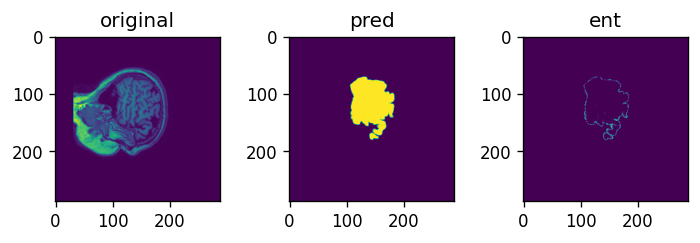

9 : 210 / 990 : BCE loss: 0.2464507669210434
9 : 220 / 990 : BCE loss: 0.26368147134780884
9 : 230 / 990 : BCE loss: 0.19940216839313507
9 : 240 / 990 : BCE loss: 0.3930124044418335
9 : 250 / 990 : BCE loss: 0.13213887810707092
9 : 260 / 990 : BCE loss: 0.2116469144821167
9 : 270 / 990 : BCE loss: 0.19142386317253113
9 : 280 / 990 : BCE loss: 0.2989072799682617
9 : 290 / 990 : BCE loss: 0.16916972398757935
9 : 300 / 990 : BCE loss: 0.4511680603027344
9 : 310 / 990 : BCE loss: 0.28112950921058655
9 : 320 / 990 : BCE loss: 0.0900464802980423
9 : 330 / 990 : BCE loss: 0.21767571568489075
9 : 340 / 990 : BCE loss: 0.31581467390060425
9 : 350 / 990 : BCE loss: 0.27368903160095215
9 : 360 / 990 : BCE loss: 0.3260915279388428
9 : 370 / 990 : BCE loss: 0.18601378798484802
9 : 380 / 990 : BCE loss: 0.3004908561706543
9 : 390 / 990 : BCE loss: 0.3808012008666992
9 : 400 / 990 : BCE loss: 0.22470809519290924


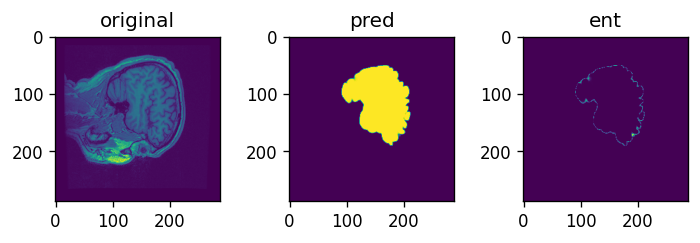

9 : 410 / 990 : BCE loss: 0.33676841855049133
9 : 420 / 990 : BCE loss: 0.20712071657180786
9 : 430 / 990 : BCE loss: 0.3994094729423523
9 : 440 / 990 : BCE loss: 0.09364759922027588
9 : 450 / 990 : BCE loss: 0.25971904397010803
9 : 460 / 990 : BCE loss: 0.1603783220052719
9 : 470 / 990 : BCE loss: 0.3183540105819702
9 : 480 / 990 : BCE loss: 0.12172414362430573
9 : 490 / 990 : BCE loss: 0.4103187918663025
9 : 500 / 990 : BCE loss: 0.12814819812774658
9 : 510 / 990 : BCE loss: 0.41820746660232544
9 : 520 / 990 : BCE loss: 0.1769818514585495
9 : 530 / 990 : BCE loss: 0.08716856688261032
9 : 540 / 990 : BCE loss: 0.3043937683105469
9 : 550 / 990 : BCE loss: 0.5061453580856323
9 : 560 / 990 : BCE loss: 0.21993480622768402
9 : 570 / 990 : BCE loss: 0.2234128713607788
9 : 580 / 990 : BCE loss: 0.394430547952652
9 : 590 / 990 : BCE loss: 0.3109447658061981
9 : 600 / 990 : BCE loss: 0.14210909605026245


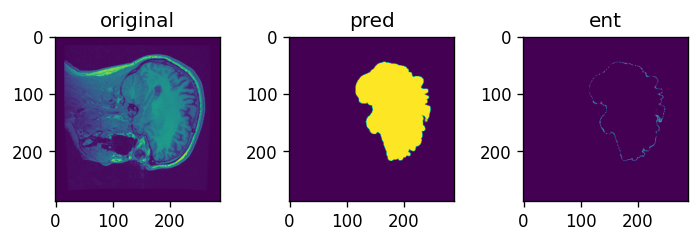

9 : 610 / 990 : BCE loss: 0.16174514591693878
9 : 620 / 990 : BCE loss: 0.09034820646047592
9 : 630 / 990 : BCE loss: 0.13422954082489014
9 : 640 / 990 : BCE loss: 0.14929534494876862
9 : 650 / 990 : BCE loss: 0.14868253469467163
9 : 660 / 990 : BCE loss: 0.2239169478416443
9 : 670 / 990 : BCE loss: 0.22024637460708618
9 : 680 / 990 : BCE loss: 0.21394065022468567
9 : 690 / 990 : BCE loss: 0.3143514394760132
9 : 700 / 990 : BCE loss: 0.2543026804924011
9 : 710 / 990 : BCE loss: 0.09015637636184692
9 : 720 / 990 : BCE loss: 0.23935595154762268
9 : 730 / 990 : BCE loss: 0.17607921361923218
9 : 740 / 990 : BCE loss: 0.22127634286880493
9 : 750 / 990 : BCE loss: 0.12856356799602509
9 : 760 / 990 : BCE loss: 0.2927405536174774
9 : 770 / 990 : BCE loss: 0.14024125039577484
9 : 780 / 990 : BCE loss: 0.2164568305015564
9 : 790 / 990 : BCE loss: 0.5893350839614868
9 : 800 / 990 : BCE loss: 0.3016563355922699


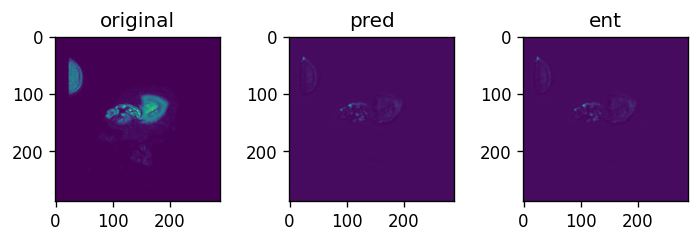

9 : 810 / 990 : BCE loss: 0.2720632553100586
9 : 820 / 990 : BCE loss: 0.306591272354126
9 : 830 / 990 : BCE loss: 0.3763277530670166
9 : 840 / 990 : BCE loss: 0.28100961446762085
9 : 850 / 990 : BCE loss: 0.20874090492725372
9 : 860 / 990 : BCE loss: 0.3169841170310974
9 : 870 / 990 : BCE loss: 0.2670566737651825
9 : 880 / 990 : BCE loss: 0.3262290358543396
9 : 890 / 990 : BCE loss: 0.21923987567424774
9 : 900 / 990 : BCE loss: 0.21861401200294495
9 : 910 / 990 : BCE loss: 0.2358311116695404
9 : 920 / 990 : BCE loss: 0.2903021574020386
9 : 930 / 990 : BCE loss: 0.0694626048207283
9 : 940 / 990 : BCE loss: 0.25806188583374023
9 : 950 / 990 : BCE loss: 0.2314487248659134
9 : 960 / 990 : BCE loss: 0.03673314303159714
9 : 970 / 990 : BCE loss: 0.26699572801589966
9 : 980 / 990 : BCE loss: 0.15463832020759583
EPOCH ACC:  86.07323455810547

9 : 0 / 135 : VAL BCE loss: 0.5000813007354736


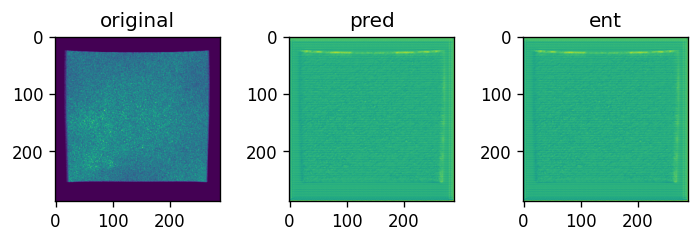

9 : 10 / 135 : VAL BCE loss: 1.6852792501449585
9 : 20 / 135 : VAL BCE loss: 1.1116415407741442e-05
9 : 30 / 135 : VAL BCE loss: 2.980232594040899e-08
9 : 40 / 135 : VAL BCE loss: 7.622079920110991e-06
9 : 50 / 135 : VAL BCE loss: 0.5000537037849426
9 : 60 / 135 : VAL BCE loss: 0.500080943107605
9 : 70 / 135 : VAL BCE loss: 0.3842701017856598
9 : 80 / 135 : VAL BCE loss: 0.922020673751831
9 : 90 / 135 : VAL BCE loss: 3.5989513397216797
9 : 100 / 135 : VAL BCE loss: 0.0018854080699384212


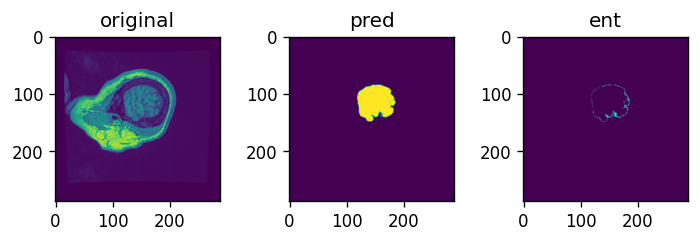

9 : 110 / 135 : VAL BCE loss: 0.5000811815261841
9 : 120 / 135 : VAL BCE loss: 0.48918503522872925
9 : 130 / 135 : VAL BCE loss: 3.1085991859436035
VAL EPOCH ACC:  88.197021484375

9 : 0 / 124 : VAL BCE loss: 0.9326280355453491


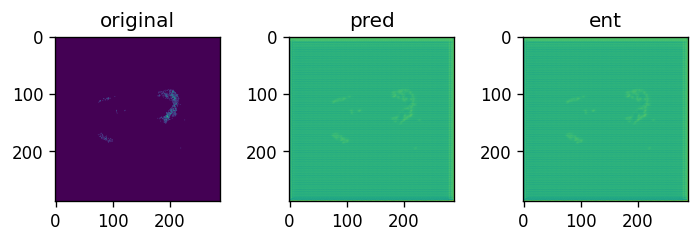

9 : 10 / 124 : VAL BCE loss: 0.7574260234832764
9 : 20 / 124 : VAL BCE loss: 0.019313858821988106
9 : 30 / 124 : VAL BCE loss: 0.0
9 : 40 / 124 : VAL BCE loss: 5.923219532633084e-07
9 : 50 / 124 : VAL BCE loss: 0.0
9 : 60 / 124 : VAL BCE loss: 0.0
9 : 70 / 124 : VAL BCE loss: 0.374889999628067
9 : 80 / 124 : VAL BCE loss: 0.3648095726966858
9 : 90 / 124 : VAL BCE loss: 0.9326280951499939
9 : 100 / 124 : VAL BCE loss: 0.9326286315917969


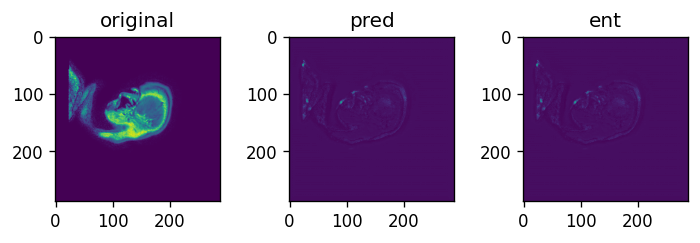

9 : 110 / 124 : VAL BCE loss: 0.0003593448200263083
9 : 120 / 124 : VAL BCE loss: 0.0
VAL EPOCH ACC:  73.080810546875



In [33]:
n_epochs = 10

for n in range(n_epochs):

  print("EPOCH: ",n)
  
  disc_model, optimizer, train_loss, acc = train_disc(n, seg_model, disc_model, optimizer, train_loader, device)

  train_stats['loss'].append(train_loss)
  train_stats['acc'].append(acc)

  print()

  src_val_loss, src_val_acc = val_disc(n, seg_model, disc_model, optimizer, src_val_loader, device)
  
  src_val_stats['loss'].append(src_val_loss)
  src_val_stats['acc'].append(src_val_acc)

  print()

  trg_val_loss, trg_val_acc = val_disc(n, seg_model, disc_model, optimizer, trg_val_loader, device)
  
  trg_val_stats['loss'].append(trg_val_loss)
  trg_val_stats['acc'].append(trg_val_acc)
  
  print()

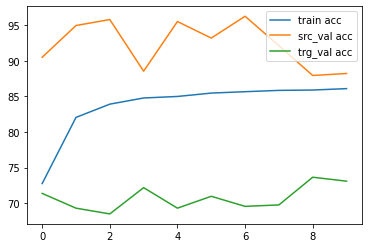

In [34]:
plt.plot(train_stats['acc'], label = 'train acc')
plt.plot(src_val_stats['acc'], label = 'src_val acc')
plt.plot(trg_val_stats['acc'], label = 'trg_val acc')
plt.legend()

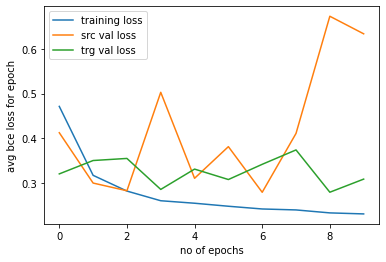

In [38]:
plt.plot(tl_mean, label = 'training loss')
plt.plot(sv_l_mean, label = 'src val loss')
plt.plot(tv_l_mean, label = 'trg val loss')
plt.xlabel('no of epochs')
plt.ylabel('avg bce loss for epoch')
plt.legend()

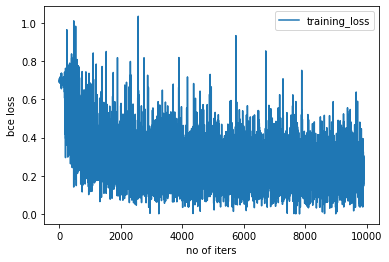

In [36]:
from statistics import mean
tl = []
tl_mean = []
for l in train_stats['loss']:
  tl.extend(l)
  tl_mean.append(mean(l))

plt.plot(tl, label = 'training_loss')
plt.xlabel('no of iters')
plt.ylabel('bce loss')
plt.legend()

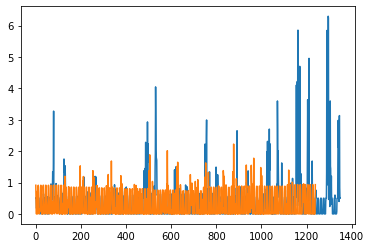

In [37]:

sv_l = []
tv_l = []
sv_l_mean = []
tv_l_mean = []

for l in src_val_stats['loss']:

  sv_l.extend(l)
  sv_l_mean.append(mean(l))
for l in trg_val_stats['loss']:
  tv_l.extend(l)
  tv_l_mean.append(mean(l))

plt.plot(sv_l, label = 'source_val loss')
plt.plot(tv_l, label = 'trg_val loss')

In [39]:
#torch.save(model,'/content/gdrive/MyDrive/VMIA_Lab_Data/GE3/ge3_entropy_disc_10epochs.pkl')

### Check outputs of model

In [46]:
seg_out, _ = seg_model( train_data.images[-16:-8].unsqueeze(dim = 1).to(device))

max_out = torch.where( seg_out >= 0.5, seg_out, 1-seg_out)
ent_out = -max_out * torch.log2(max_out)
disc_out = disc_model(ent_out.detach().to(device)).squeeze()

print(disc_out.detach())
torch.where(disc_out > 0.5, 1, 0)

tensor([9.9402e-17, 1.0000e+00, 1.0000e+00, 6.0648e-01, 9.9995e-01, 7.7760e-01,
        6.0648e-01, 6.6147e-13], device='cuda:0')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0, 1, 1, 1, 1, 1, 1, 0], device='cuda:0')

In [47]:
print(train_data.labels[-16:-8])

tensor([0., 1., 1., 0., 1., 1., 1., 0.])


In [49]:
(train_data.labels[-16:-8].detach().to('cpu') == torch.where(disc_out > 0.5, 1, 0).detach().to('cpu')).sum()

tensor(7)

# Entropy Example

torch.Size([288, 288])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


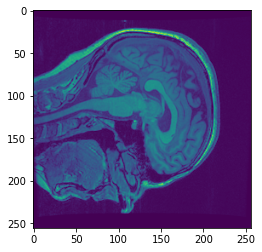

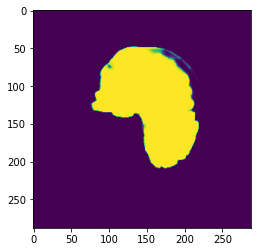

tensor(-0., device='cuda:0', grad_fn=<MinBackward1>) tensor(0.0034, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4990, device='cuda:0', grad_fn=<MaxBackward1>)


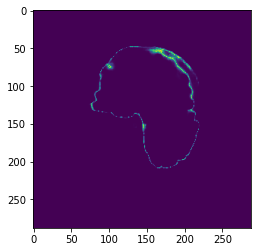

tensor(-0., device='cuda:0', grad_fn=<MinBackward1>) tensor(0.0068, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.5307, device='cuda:0', grad_fn=<MaxBackward1>)


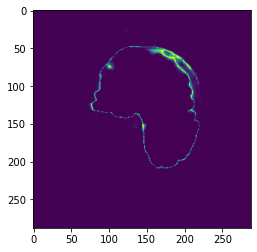

In [72]:
def get_transform(pad_size):
    pad = transforms.Pad(pad_size, fill=0, padding_mode="constant")  
    return transforms.Compose([pad])

path = '/content/gdrive/MyDrive/VMIA_Lab_Data/data/'
scan = 'CC0310_ge_3_51_F.nii.gz'
file_path = path+'Original/'
scan_nii = nib.load(os.path.join( file_path , scan))

tensor = torch.from_numpy(np.asarray(scan_nii.dataobj)).float()
normalized_tensor = tensor/tensor.max()

sliced = normalized_tensor[100]
sliced.shape

scan_size = sliced.shape[-1]
transform = get_transform(int((288 - scan_size) / 2))
scan = transform(sliced)
print(scan.shape)

model = torch.load('/content/gdrive/MyDrive/VMIA_Lab_Data/GE3/ge3_updateddata_train70_25epochs_combinedloss.pkl',
                    map_location=device)
out = model(scan.unsqueeze(0).unsqueeze(0).to(device))[0]

plt.imshow(tensor[100])
plt.pause(0.01)

plt.imshow(out.squeeze().squeeze().detach().to('cpu'))
plt.pause(0.01)

out1 = torch.where(out > 0.5, out, 1-out )
x = -out1*(torch.log2(out1))
print(x.min(),x.mean(),x.max())
plt.imshow(x.squeeze().squeeze().detach().to('cpu'))
plt.pause(0.01)

x = -out*(torch.log2(out))
print(x.min(),x.mean(),x.max())
plt.imshow(x.squeeze().squeeze().detach().to('cpu'))
plt.pause(0.01)

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900], dtype=torch.float64)


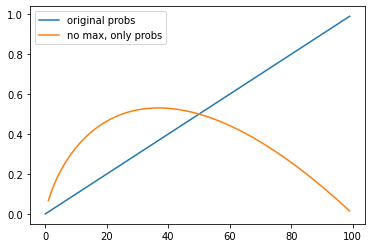

tensor([1.0000, 0.9900, 0.9800, 0.9700, 0.9600, 0.9500, 0.9400, 0.9300, 0.9200,
        0.9100, 0.9000, 0.8900, 0.8800, 0.8700, 0.8600, 0.8500, 0.8400, 0.8300,
        0.8200, 0.8100, 0.8000, 0.7900, 0.7800, 0.7700, 0.7600, 0.7500, 0.7400,
        0.7300, 0.7200, 0.7100, 0.7000, 0.6900, 0.6800, 0.6700, 0.6600, 0.6500,
        0.6400, 0.6300, 0.6200, 0.6100, 0.6000, 0.5900, 0.5800, 0.5700, 0.5600,
        0.5500, 0.5400, 0.5300, 0.5200, 0.5100, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900], dtype=torch.float64)


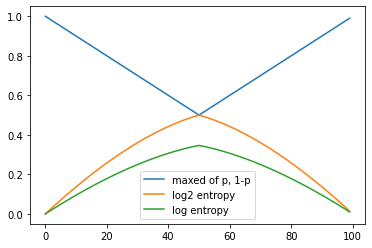

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x = torch.from_numpy(np.array(list(range(0,100,1)))/100)
print(x)
plt.plot(x,label = 'original probs')

plt.plot(-x*torch.log2(x), label = 'no max, only probs')
plt.legend()
plt.pause(0.01)

x = torch.where(x >= 0.5, x, 1-x)
print(x)
plt.plot(x, label = 'maxed of p, 1-p')
plt.plot(-x*torch.log2(x), label = 'log2 entropy')
plt.plot(-x*torch.log(x), label = 'log entropy')
plt.legend()
plt.pause(0.01)

In [39]:

path = '/content/gdrive/MyDrive/VMIA_Lab_Data/data/'
scan = 'CC0310_ge_3_51_F.nii.gz'
file_path = path+'Original/'
scan_nii = nib.load(os.path.join( file_path , scan))

tensor = torch.from_numpy(np.asarray(scan_nii.dataobj)).float()
normalized_tensor = tensor/tensor.max()

print(normalized_tensor.min(), normalized_tensor.mean(), normalized_tensor.max())

sliced = normalized_tensor[101]
sliced.shape
print(sliced.min(), sliced.mean(), sliced.max())

tensor(0.) tensor(0.0910) tensor(1.)
tensor(0.) tensor(0.1431) tensor(0.8626)


In [28]:
model = torch.load('/content/gdrive/MyDrive/VMIA_Lab_Data/GE3/ge3_updateddata_train70_25epochs_combinedloss.pkl',
                    map_location='cpu')


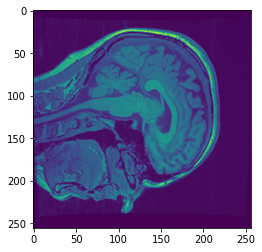

torch.Size([256, 256])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


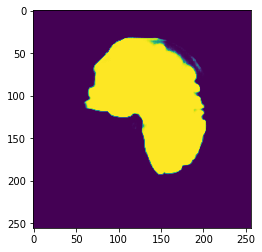

In [40]:
plt.imshow(sliced)
plt.pause(0.01)
print(sliced.shape)
out = model(sliced.unsqueeze(dim = 0).unsqueeze(dim=0))
plt.imshow(out[0].detach().squeeze().squeeze())

In [41]:
print("SLICE", sliced.min(), sliced.max())

print("OUT", out[0].min().item(),out[1].max().item())

SLICE tensor(0.) tensor(0.8626)
OUT 7.97808897914365e-05 122.52603149414062


In [43]:
ent_slice = -sliced*np.log2(sliced)
print(ent_slice.min(), ent_slice.max())

tensor(nan) tensor(nan)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [49]:
ent_out = -out[0].detach()*np.log2(out[0].detach())
print(ent_out[0].min(),ent_out[0].max())

tensor(-0.) tensor(0.5307)
